<div align='center'> 
    <h1 style=font-size:2.5em>Forecasting Credit Card Defaults Using Machine Learning Techniques</h1><br>
</div>

**BUAN 6340**  
**Student Name: Shiva Kumar Reddy Koppula**  

## Abstract

<div><p><br>
Financial institutions need to measure risks within their credit portfolios for regulatory requirements and for internal risk management. To meet these requirements financial institutions increasingly rely on models and algorithms to predict losses resulting from customers' defaults. Hence, developing sufficiently accurate and robust models is one of the major efforts of quantitative risk management groups within these institutions.<br><br>
This project develops robust and efficient models for the credit default risk problem. Specifically, build some Machine Learning classification algorithms and develop them to predict default risk for credit card accounts.
</p></div>

In [1]:
from IPython.display import HTML

HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier


# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('darkgrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

# Table of Contents
1. [Introduction](#introduction)<br>
2. [Exploratory Data Analysis](#eda)<br>
    2.1 [Dataset Description](#description)<br>
    2.2 [Data Cleaning](#cleaning)<br>
    2.3 [Data Exploration](#exploration)<br>
    2.4 [Correlation Among Features](#correlation)<br>
    2.5 [Normality Check](#normality)<br>
3. [Data Preprocessing](#preprocessing)<br>
    3.1 [Handling Categorical Features](#one-hot)<br>
    3.2 [Dataset Partition](#train-test)<br>
    3.3 [Feature Scaling](#scaling)<br>
    3.4 [Dimensionality Reduction](#pca)<br>
    3.5 [Dealing with Class Imbalance](#imbalance)<br>
4. [Model Evaluation Methodology](#method)<br>
    4.1 [Validation](#validation)<br>
    4.2 [Performance Evaluation Metrics](#metrics)<br>
5. [Classification Models](#models)<br>
    5.1 [Logistic Regression](#logistic)<br>
    5.2 [Support Vector Machine](#svm)<br>
    5.3 [Tree-Based Methods](#tree)<br>
    5.4 [Models' Performance Results](#results)<br>
6. [Conclusion](#conclusion)<br>

    [References](#references)

<a id='introduction'></a>
# 1. Introduction
In 1990, Taiwan enabled the creation of new banks, which initially partnered with real estate companies before shifting focus to the credit card sector as the real estate market became saturated. These banks aggressively issued credit and cash cards to unqualified applicants to expand their market share, leading to widespread misuse and debt accumulation among cardholders, regardless of their ability to repay. This behavior resulted in defaults, undermining consumer finance confidence and presenting significant challenges for both banks and cardholders.

In this project, I predict who is likely to default. I build an automated model based on the information about the client and historical transactions, capable of identifying key factors and predicting a credit card default.

<a id='eda'></a>
# 2. Exploratory Data Analysis

<a id='description'></a>
## 2.1 Dataset Description
Our study is conducted on the *Default of credit card clients* dataset from the UCI machine learning repository. It gathers $30,000$ observations made by a bank in Taiwan on distinct credit card holders from April 2005 to September 2005. The dataset employs the binary variable `default.payment.next.month` as response variable. It indicates whether or not the credit card holders are defaulters next month. Then, the following 23 variables are used as explanatory variables. I reported the below official description from UCI.
- Client personal information:
    1. `LIMIT_BAL`: Amount of given credit (in *New Taiwan* dollars): it includes both the individual consumer credit and his/her family (supplementary) credit.
    2. `SEX`: 1 = male; 2 = female.
    3. `EDUCATION`: 1 = graduate school; 2 = university; 3 = high school; 4 = others.
    4. `MARRIAGE`: Marital status, 1 = married; 2 = single; 3 = others.
    5. `AGE`: Age in years.   
- History of past payments from April to September 2005, i.e., the delay of the past payment referred to a specific month:
    6. `PAY_0`: Repayment status in September, 2005.
    7. `PAY_2`: Repayment status in August, 2005.
    8. `PAY_3`: Repayment status in July, 2005.
    9. `PAY_4`: Repayment status in June, 2005.
    10. `PAY_5`: Repayment status in May, 2005.
    11. `PAY_6`: Repayment status in April, 2005.   
 
 The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- Amount of bill statement (in *New Taiwan* dollars), i.e. a monthly report that credit card companies issue to credit card holders in a specific month:
    12. `BILL_AMT1`: Amount of bill statement in September, 2005.
    13. `BILL_AMT2`: Amount of bill statement in August, 2005.
    14. `BILL_AMT3`: Amount of bill statement in July, 2005.
    15. `BILL_AMT4`: Amount of bill statement in June, 2005.
    16. `BILL_AMT5`: Amount of bill statement in May, 2005.
    17. `BILL_AMT6`: Amount of bill statement in April, 2005.
- Amount of previous payment (in *New Taiwan* dollars):
    18. `PAY_AMT1`: Amount of previous payment in September, 2005.
    19. `PAY_AMT2`: Amount of previous payment in August, 2005.
    20. `PAY_AMT3`: Amount of previous payment in July, 2005.
    21. `PAY_AMT4`: Amount of previous payment in June, 2005.
    22. `PAY_AMT5`: Amount of previous payment in May, 2005.
    23. `PAY_AMT6`: Amount of previous payment in April, 2005.
    
In order to understand what the data looks like, we print some observations in the table below. The target `default.payment.next.month` is renamed `DEFAULT` to be short, while the `PAY_0` column is renamed `PAY_1`.

In [5]:
# read and creation of dataframe
df = pd.read_excel(r'C:\Shiva Files\Shiva SSD\Shiva\MSBA Cohort\Semester 2\Programming for DS\Project\default+of+credit+card+clients\default of credit card clients.xls', header=1, index_col='ID')
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns=lambda x: x.upper(), inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The information on the dataset reported below show that there are no missing features for any of the $30,000$ samples.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   30000 

<a id='cleaning'></a>
## 2.2 Data Cleanining
### 2.2.1 Client Personal Information
Below, I outline the client's personal information attributes. The `LIMIT_BAL`, `SEX`, and `AGE` fields match the previously provided descriptions. However, `EDUCATION` and `MARRIAGE` include undocumented categories, with `EDUCATION` spanning 0 to 6 and `MARRIAGE` starting at 0.

In [7]:
df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500
std,129747.661567,0.489129,0.790349,0.521970,9.217904
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000


In [8]:
df['EDUCATION'].value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

In [9]:
df['MARRIAGE'].value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

The presence of errors in the dataset can be addressed by correcting the wrong attribute, or by deleting the rows associated with the error. We could take a conservative approach and group the undocumented categories into *others*, but since anomalous entries are relatively few ($399$, $1.33\%$ of the total number), I decide to eliminate them.

In [10]:
# remove useless and incorrect information
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[df['MARRIAGE']==0].index)
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)
print(f"Dataset size after:\t{df.shape[0]}")

# Alternative
# df['MARRIAGE'] = np.where(df['MARRIAGE']==0, 3, df['MARRIAGE'])
# df['EDUCATION'] = np.where(df['EDUCATION']==0, 4, df['EDUCATION'])
# df['EDUCATION'] = np.where(df['EDUCATION']==5, 4, df['EDUCATION'])
# df['EDUCATION'] = np.where(df['EDUCATION']==6, 4, df['EDUCATION'])

Dataset size before:	30000
Dataset size after:	29601


### 2.2.2 History of Past Payments
Below I print the description of the history of past payments features. The columns `PAY_n` range from -2 (undocumented) to 8, hence we believe they need to be rescaled to match the official description.

In [11]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [12]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    df.loc[df[p]<0, p] = -1
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

### 2.2.3 Amount of Bill Statement and Previous Payment
Below I print the description of the features related to the amount of bill statement and the amount of previous payment. I do not find any anomalies.

In [13]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000
mean,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816
std,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000
50%,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000
75%,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [14]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000
mean,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374
std,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000
50%,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


<a id='exploration'></a>
## 2.3 Data Exploration
In this section I show some graphs to better understand the relationship between the features and the target `DEFAULT`.

First, we see that the dataset we are dealing with is quite unbalanced, with only $6,636$ defaulters ($22.1\%$ of the total number). This is a rather relevant problem that needs to be addressed. If neglected, classification models will tend to focus on the majority class and overlook the minority class.

In [15]:
df['DEFAULT'].value_counts()

DEFAULT
0    22996
1     6605
Name: count, dtype: int64

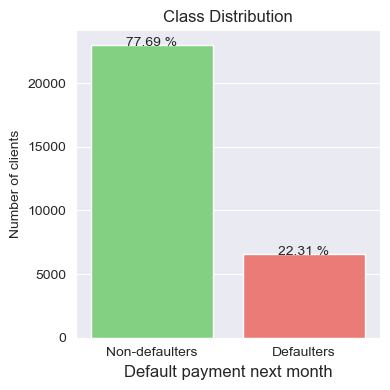

In [16]:
# Class distribution
plt.figure(figsize = (4,4))
graph_target = sns.countplot(x="DEFAULT", data=df, palette=['#77DD76','#FF6962'])

i=0
for p in graph_target.patches:
    height = p.get_height()
    
    percentage = round(100 * df["DEFAULT"].value_counts()[i] / len(df),2)
    
    str_plot = f'{percentage} %'
    
    graph_target.text(p.get_x()+p.get_width()/2., height - 100, str_plot, ha="center")
    i += 1
    
plt.title('Class Distribution')
plt.xticks([0,1],['Non-defaulters', 'Defaulters'])
plt.xlabel('Default payment next month', fontsize=12)
plt.ylabel('Number of clients')
plt.tight_layout()

plt.show()

For the feature `LIMIT_BAL`, we draw a density map according to the default type, and the result is shown below on the left. It seems that when the given credit amount is approximately below $140,000$, the probability of default is greater than that of non-default. This suggests that those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default. This observation makes sense as a higher credit limit is given to people with higher creditworthiness that have a lower likelihood to default.

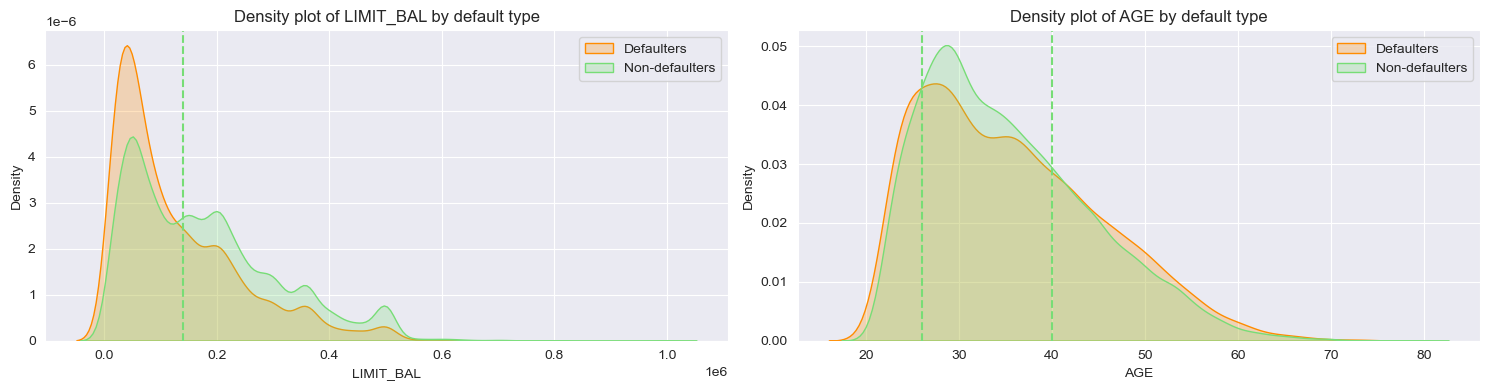

In [17]:
# Kernel density distribution
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 2, figsize=(15,4))

class_0 = df.loc[df['DEFAULT'] == 0]['LIMIT_BAL']
class_1 = df.loc[df['DEFAULT'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[0])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[0])
axs[0].axvline(0.14*1e6, 0, ls='--')
axs[0].legend()

class_0 = df.loc[df['DEFAULT'] == 0]['AGE']
class_1 = df.loc[df['DEFAULT'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[1])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[1])
axs[1].axvline(26, 0, ls='--')
axs[1].axvline(40, 0, ls='--')
axs[1].legend()

fig.tight_layout()
plt.show()

For the feature `AGE`, we perform a similar visual analysis, as shown above on the right. The probability of non-default of age between approximately $25$ and $40$ is higher, which indicates that consumers in this age group are more capable of repaying credit card loans. This may be because their work and family tend to be stable without too much pressure.

The features `SEX`, `EDUCATION`, and `MARRIAGE` are plotted according to the target variable using histograms, as shown below. Whether it is male or female, the proportion of defaulters is in line with the general situation, and we can say the same for the categories of the other two features.

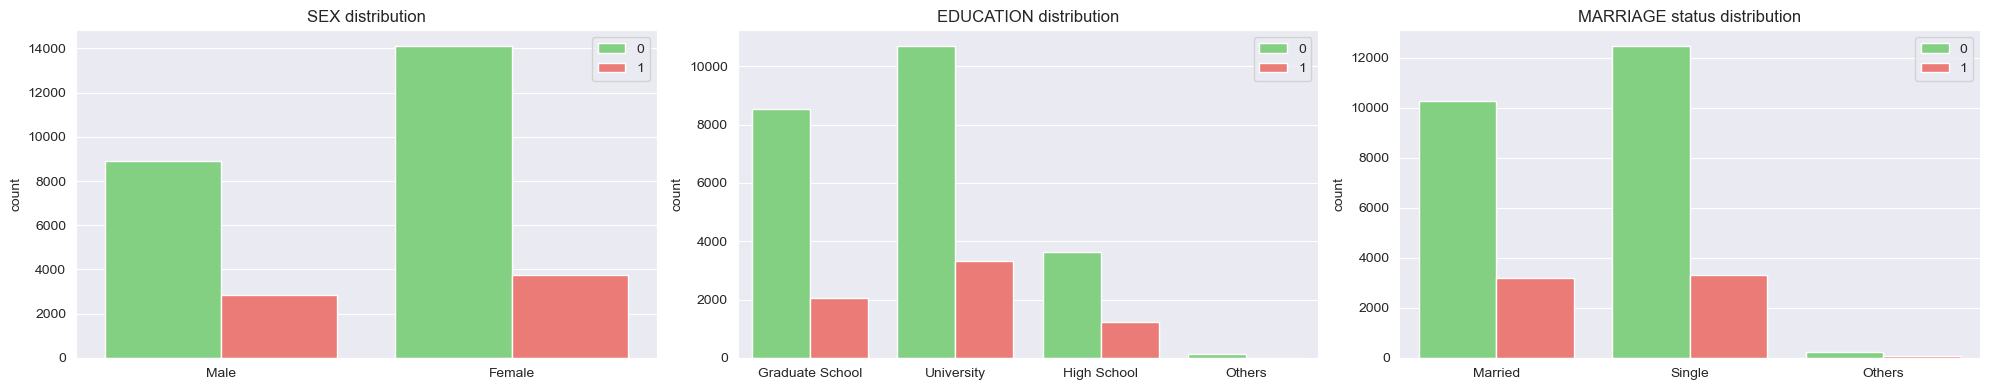

In [18]:
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 3, figsize=(20,4))

axs[0].set_title('SEX distribution')
sns.countplot(x='SEX', hue='DEFAULT', data=df, ax=axs[0])
axs[0].set_xticklabels(['Male', 'Female'])
axs[0].set_xlabel('')
axs[0].legend()

axs[1].set_title('EDUCATION distribution')
sns.countplot(x='EDUCATION', hue='DEFAULT', data=df, ax=axs[1])
axs[1].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
axs[1].set_xlabel('')
axs[1].legend()

axs[2].set_title('MARRIAGE status distribution')
sns.countplot(x='MARRIAGE', hue='DEFAULT', data=df, ax=axs[2])
axs[2].set_xticklabels(['Married', 'Single', 'Others'])
axs[2].set_xlabel('')
axs[2].legend()

fig.tight_layout()
plt.show()

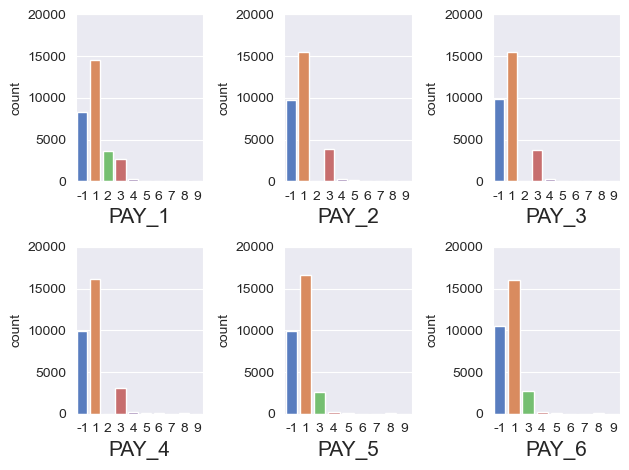

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

PAY_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']  # example column names

for i, col in enumerate(PAY_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=df, palette='muted')
    plt.ylim(0, 20000)
    plt.xlabel(col, fontsize=15)

plt.tight_layout()
plt.show()

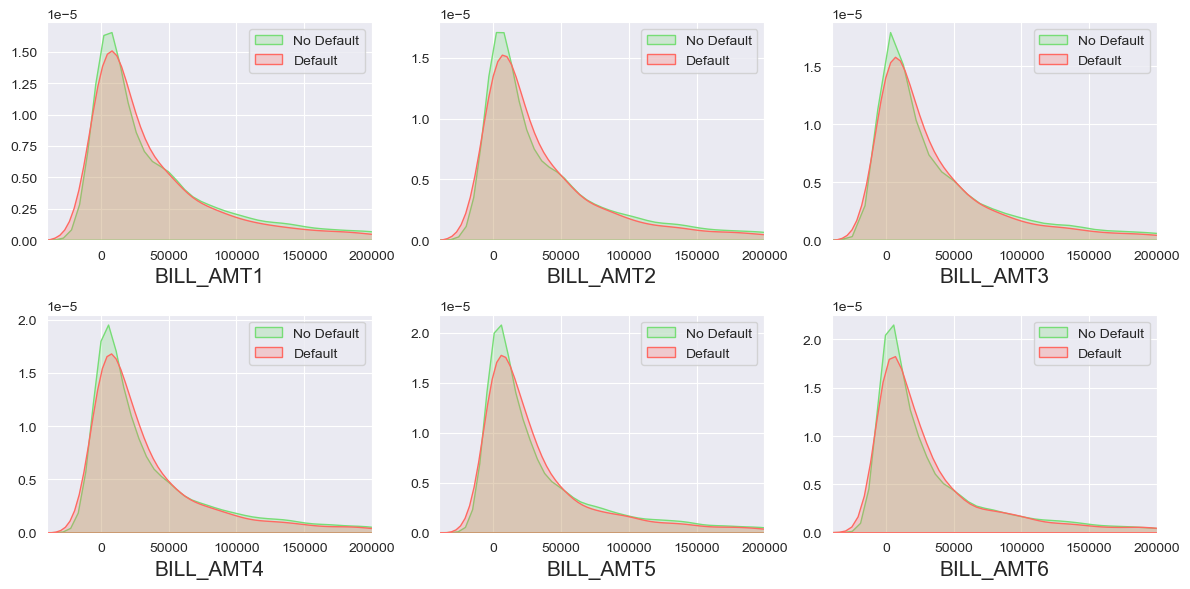

In [20]:
BILL_AMT_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(BILL_AMT_cols):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default',color='#77DD76', shade=True)
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', color='#FF6962', shade=True)
    plt.xlim(-40000,200000)
    plt.ylabel('')
    plt.xlabel(col,fontsize=15)
    plt.legend()
    plt.tight_layout()

plt.show()

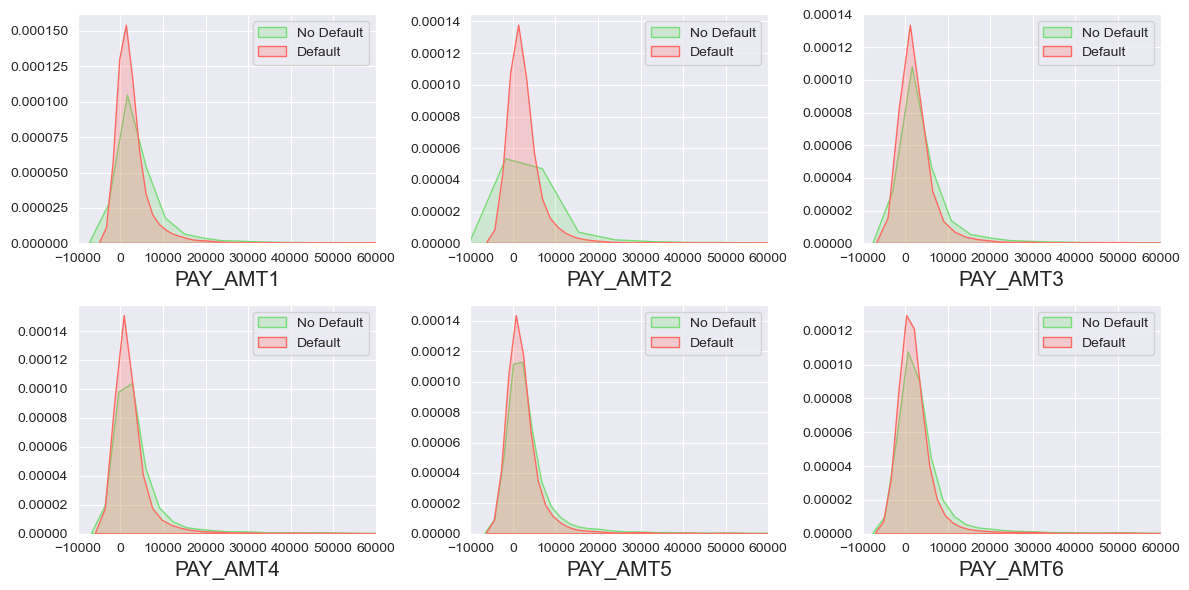

In [21]:
PAY_AMT_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(PAY_AMT_cols):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['DEFAULT'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
    sns.kdeplot(df.loc[(df['DEFAULT'] == 1), col], label = 'Default', shade = True, color='#FF6962')
    plt.xlim(-10000,60000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
    
plt.show()

The payment status feature set is shown below via boxplots. It can be seen that clients who delay payment by one month or less have fewer credit card defaults. In particular, the repayment status in September, i.e., `PAY_1`, holds a greater discriminatory power than the repayment status in the other months.

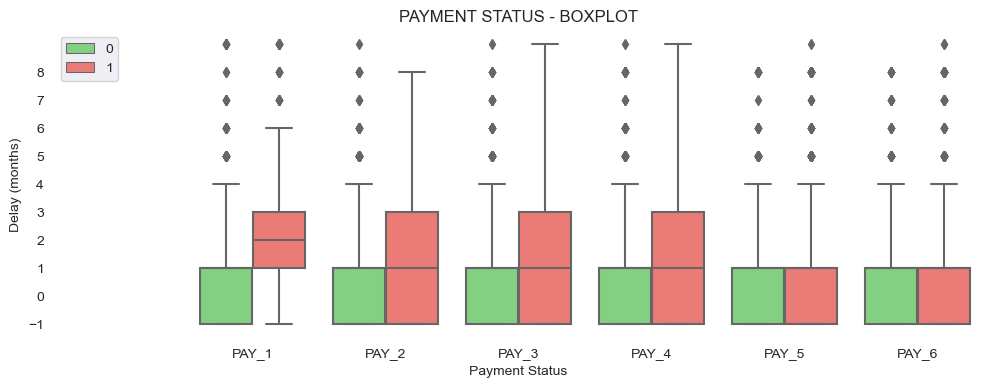

In [23]:
repayment = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']]
repayment = pd.melt(repayment, 
                    id_vars="DEFAULT",
                    var_name="Payment Status",
                    value_name='Delay (months)')


plt.figure(figsize=(12,4))
sns.boxplot(y="Delay (months)", x="Payment Status", hue="DEFAULT", data=repayment, palette=sns.color_palette(('#77DD76','#FF6962')))
plt.xlim([-1.5,5.5])
plt.ylim([-1.5,9.5])
plt.yticks(np.arange(-1,9))
plt.title('PAYMENT STATUS - BOXPLOT')
plt.legend()
plt.box(False)

<a id='correlation'></a>
## 2.4 Correlation Among Features
The considered dataset has many attributes, and the presence of strongly correlated features may lead to a drop in the performances of some classification algorithms.

Below I show only the lower half of the correlation matrix between the numeric features (diagonal excluded).

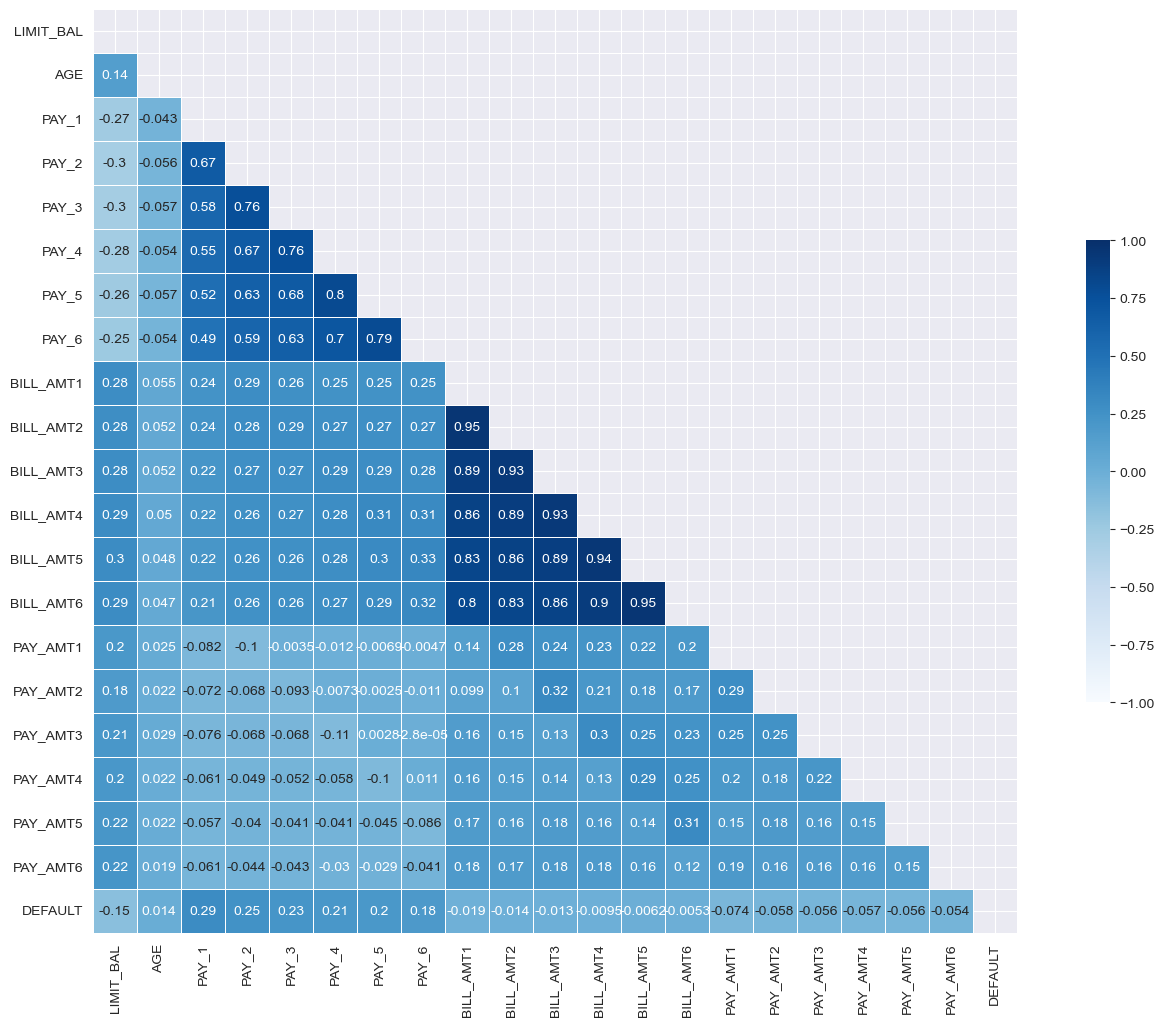

In [24]:
numeric = ['LIMIT_BAL','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'DEFAULT']
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

We note that there is a strong positive correlation between the `BILL_AMTn` features, which may indicate a redundancy of information. Hence, I report the scatter plots of these variables to highlight their interaction. The matrix below contains, for each combination of variables, a small scatterplot that displays the distribution of data points among the two variables considered, separated by the two classes. The linear trend confirms what the Pearson coefficient suggested, namely that the `BILL_AMTn` features encode rather similar information.

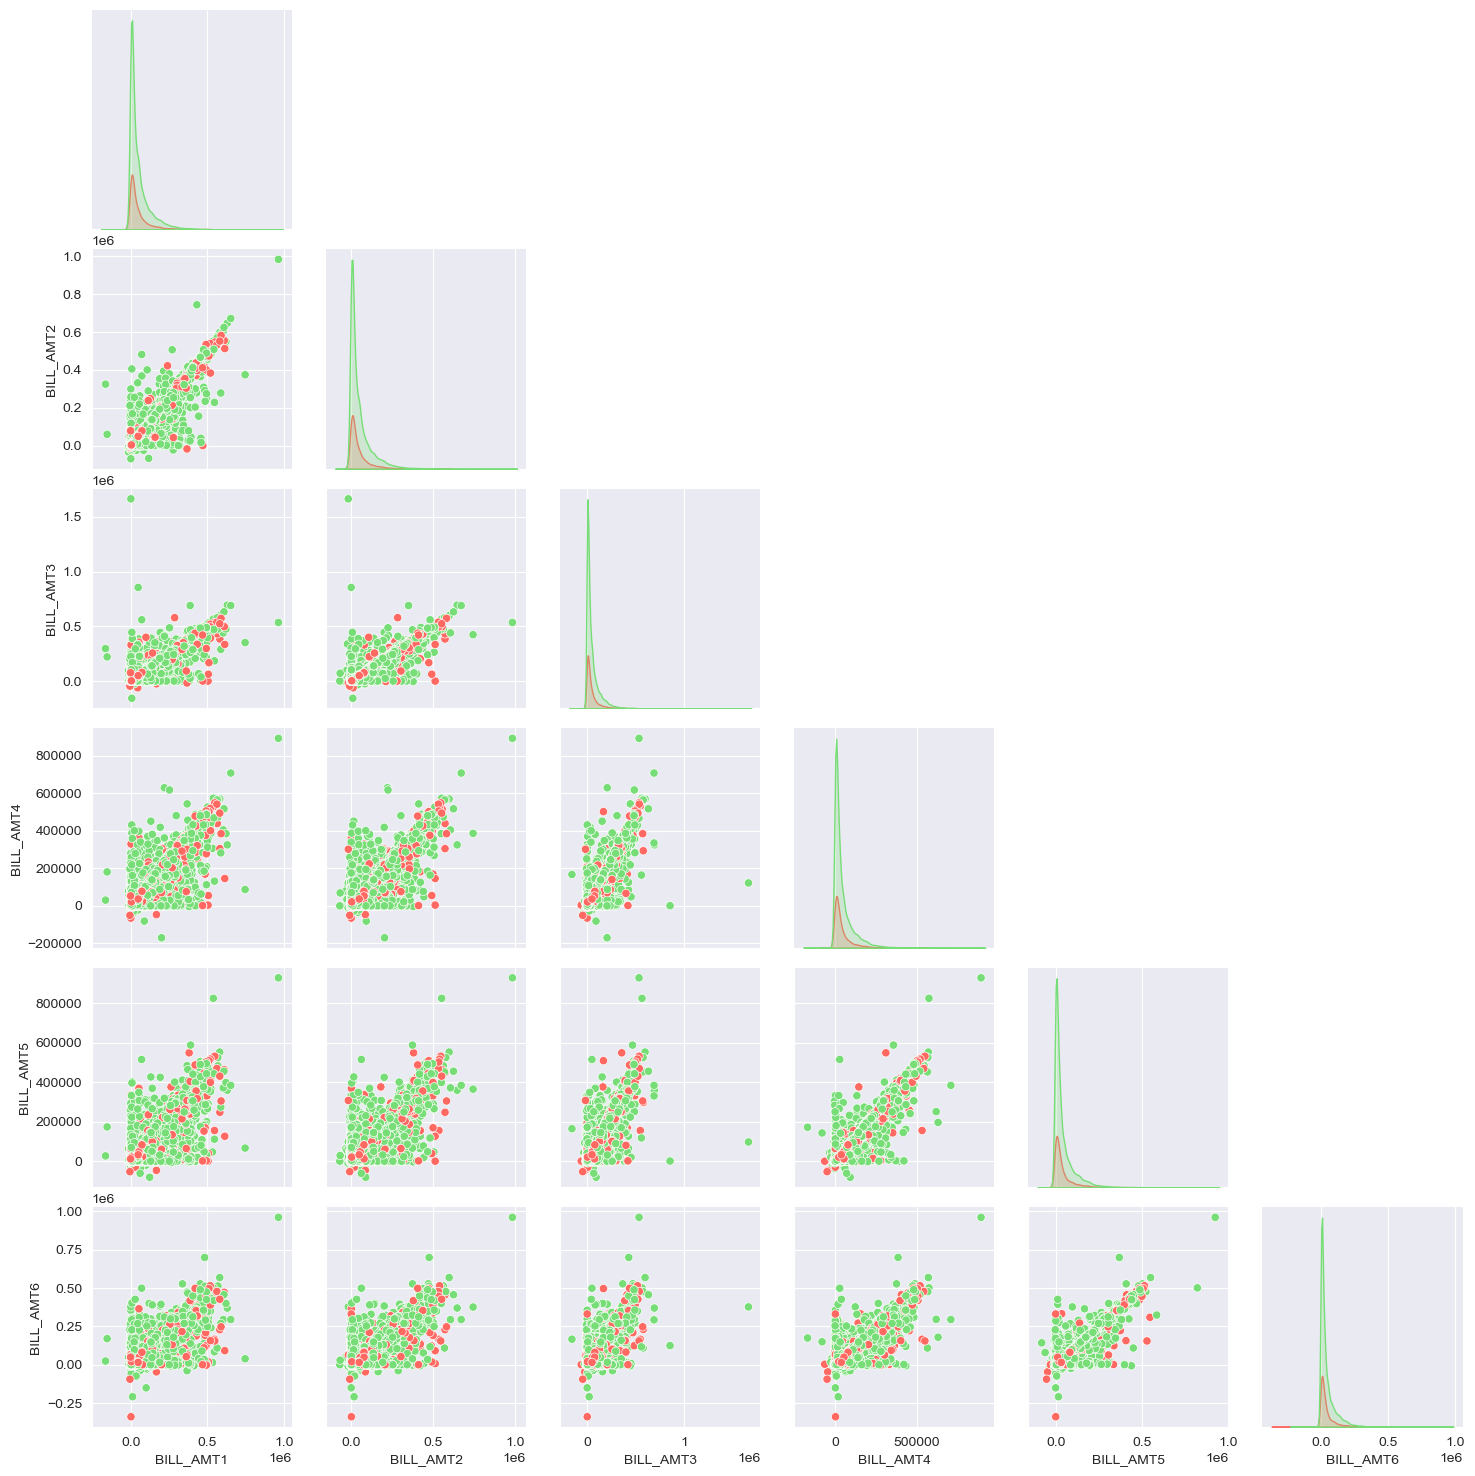

In [25]:
pair_plot = sns.pairplot(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','DEFAULT']], hue='DEFAULT', diag_kind='kde', corner=True)
pair_plot._legend.remove()

<a id='normality'></a>
## 2.5 Normality Check
To check whether my data is Gaussian, I use a graphical method called Quantile-Quantile (QQ) plot.

The following plots show that there is no evidence to believe that numerical features are normally distributed.

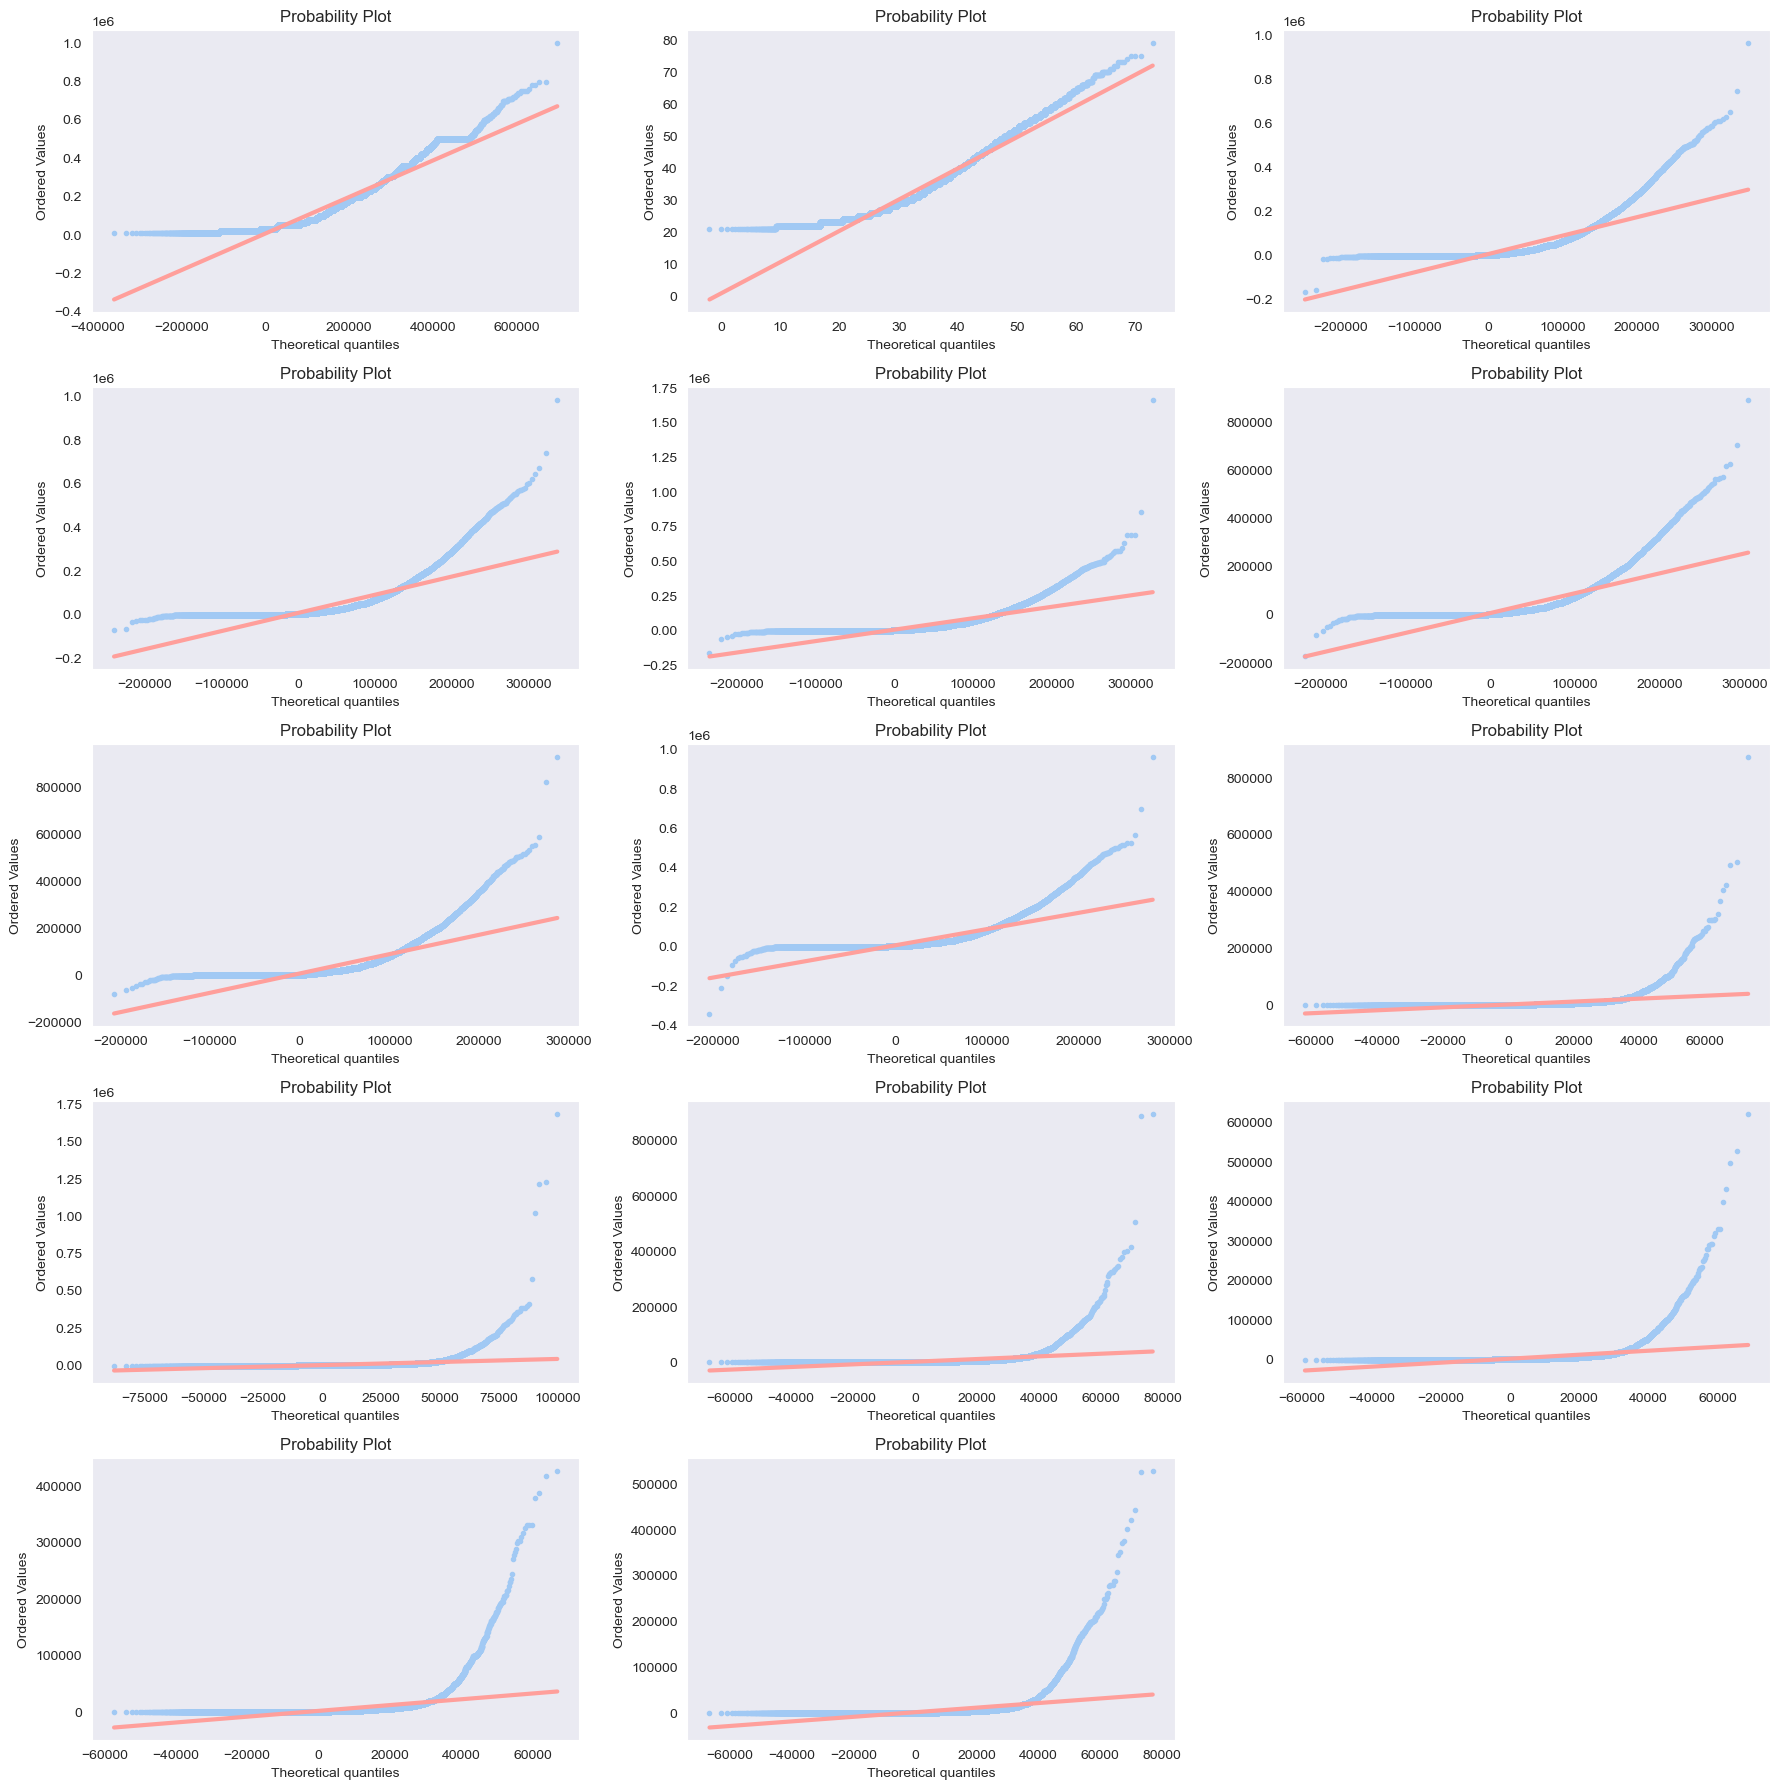

In [26]:
# Check gaussian distribution
sns.set_color_codes('pastel')
fig, axs = plt.subplots(5, 3, figsize=(18,18))

numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
i, j = 0, 0
for f in numeric:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(df[f], 
                   dist='norm', 
                   sparams=(df[f].mean(), df[f].std()), 
                   plot=axs[i,j])
    axs[i,j].get_lines()[0].set_marker('.')
    
    axs[i,j].grid()
    axs[i,j].get_lines()[1].set_linewidth(3.0)
    j = j+1

fig.tight_layout()
axs[4,2].set_visible(False)
plt.show()

<a id='preprocessing'></a>
# 3. Data Preprocessing

<a id='one-hot'></a>
## 3.1 Handling Categorical Features
I decide to do the mapping of the features by hand, since there are few. In this way I can mitigate the problem of *multicollinearity*, which occurs when there are highly correlated features. Thus, I create the following boolean columns and drop the old ones, `EDUCATION`, `SEX`, and `MARRIAGE`.
- `MALE`: 1 = male; 0 = female.
- `MARRIED`: 1 = married marital status; 0 = otherwise.
- `GRAD_SCHOOL`: 1 = graduate school level of education; 0 = otherwise.
- `UNIVERSITY`: 1 = university level of education; 0 = otherwise.
- `HIGH_SCHOOL`: 1 = high school level of education; 0 = otherwise.

In [27]:
df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype('category')
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype('category')
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype('category')
df.drop('EDUCATION', axis=1, inplace=True)

df['MALE'] = (df['SEX'] == 1).astype('category')
df.drop('SEX', axis=1, inplace=True)

df['MARRIED'] = (df['MARRIAGE'] == 1).astype('category')
df.drop('MARRIAGE', axis=1, inplace=True)

df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3,3,-1,-1,-1,-1,3913,3102,...,0,0,0,0,1,False,True,False,False,True
2,120000,26,-1,3,1,1,1,3,2682,1725,...,1000,1000,0,2000,1,False,True,False,False,False
3,90000,34,1,1,1,1,1,1,29239,14027,...,1000,1000,1000,5000,0,False,True,False,False,False
4,50000,37,1,1,1,1,1,1,46990,48233,...,1200,1100,1069,1000,0,False,True,False,False,True
5,50000,57,-1,1,-1,1,1,1,8617,5670,...,10000,9000,689,679,0,False,True,False,True,True


<a id='train-test'></a>
## 3.2 Dataset Partition
I separate the dataset into *training set* and *test set*, with the proportion 3:1. We set `random_state = 24` to make the experiments repeatable.

In [28]:
y = df['DEFAULT']
X = df.drop('DEFAULT', axis=1, inplace=False)

In [29]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=24, stratify=y)
print('Training set shape: ', np.shape(X_train_raw))
print(f'- Defaulters:\t {len(y_train[y_train==1])}')
print(f'- Non-defaulters: {len(y_train[y_train==0])}')
print('Test set shape: ', np.shape(X_test_raw))
print(f'- Defaulters:\t {len(y_test[y_test==1])}')
print(f'- Non-defaulters: {len(y_test[y_test==0])}')

Training set shape:  (22200, 25)
- Defaulters:	 4954
- Non-defaulters: 17246
Test set shape:  (7401, 25)
- Defaulters:	 1651
- Non-defaulters: 5750


<a id='scaling'></a>
## 3.3 Features Scaling
There are two common approaches to bringing different features onto the same scale: **normalization** and **standardization**. Normalization refers to the rescaling of the features to a range of which is a special case of *min-max scaling*:

To provide a fair benchmark, I fit the statistics (min-max for normalization, mean and standard deviation for standardization) on the training set, and then transform both training and test sets according to them.

I compare the two approaches by showing the box-and-wiskers plots of the respective scaled data. Notice the high number of *outliers*. I do not eliminate any sample as an outlier because the literature on the dataset does not provide information on this, and I lack knowledge about the domain. While normalization suppress the effect of outliers, standardization mantains information about them. Since the technique I will apply shortly is sensitive to the presence of outliers, I decide to continue the project with the normalized data.

In [30]:
scaler = MinMaxScaler()
X_train_norm = X_train_raw.copy()
X_test_norm = X_test_raw.copy()

X_train_norm['LIMIT_BAL'] = scaler.fit_transform(X_train_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_test_norm['LIMIT_BAL'] = scaler.transform(X_test_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_train_norm['AGE'] = scaler.fit_transform(X_train_raw['AGE'].values.reshape(-1, 1))
X_test_norm['AGE'] = scaler.transform(X_test_raw['AGE'].values.reshape(-1, 1))
for i in range(1,7):
    X_train_norm['PAY_' + str(i)] = scaler.fit_transform(X_train_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_test_norm['PAY_' + str(i)] = scaler.transform(X_test_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_train_norm['BILL_AMT' + str(i)] = scaler.fit_transform(X_train_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_test_norm['BILL_AMT' + str(i)] = scaler.transform(X_test_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_train_norm['PAY_AMT' + str(i)] = scaler.fit_transform(X_train_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))
    X_test_norm['PAY_AMT' + str(i)] = scaler.transform(X_test_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))

In [31]:
scaler = StandardScaler()
X_train_std = X_train_raw.copy()
X_test_std = X_test_raw.copy()

X_train_std['LIMIT_BAL'] = scaler.fit_transform(X_train_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_test_std['LIMIT_BAL'] = scaler.transform(X_test_raw['LIMIT_BAL'].values.reshape(-1, 1))
X_train_std['AGE'] = scaler.fit_transform(X_train_raw['AGE'].values.reshape(-1, 1))
X_test_std['AGE'] = scaler.transform(X_test_raw['AGE'].values.reshape(-1, 1))
for i in range(1,7):
    X_train_std['PAY_' + str(i)] = scaler.fit_transform(X_train_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_' + str(i)] = scaler.transform(X_test_raw['PAY_' + str(i)].values.reshape(-1, 1))
    X_train_std['BILL_AMT' + str(i)] = scaler.fit_transform(X_train_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['BILL_AMT' + str(i)] = scaler.transform(X_test_raw['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_train_std['PAY_AMT' + str(i)] = scaler.fit_transform(X_train_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_AMT' + str(i)] = scaler.transform(X_test_raw['PAY_AMT' + str(i)].values.reshape(-1, 1))

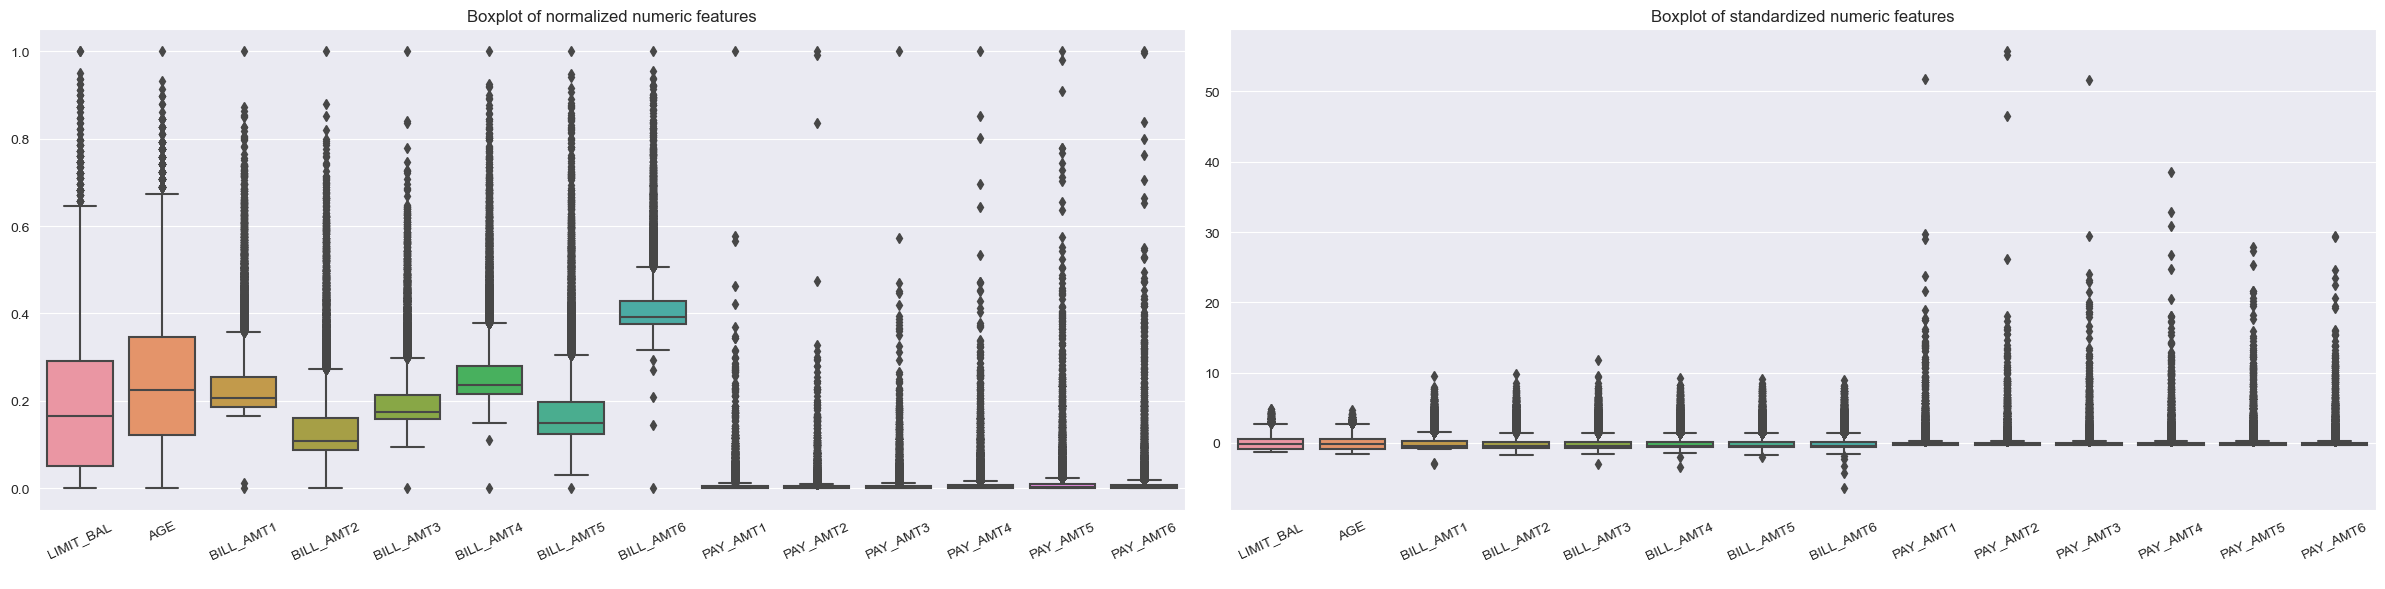

In [33]:
sns.set_color_codes('deep')
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
fig, axs = plt.subplots(1, 2, figsize=(24,6))

sns.boxplot(data=X_train_norm[numeric], ax=axs[0])
axs[0].set_title('Boxplot of normalized numeric features')
axs[0].set_xticklabels(labels=numeric, rotation=25)
axs[0].set_xlabel(' ')

sns.boxplot(data=X_train_std[numeric], ax=axs[1])
axs[1].set_title('Boxplot of standardized numeric features')
axs[1].set_xticklabels(labels=numeric, rotation=25)
axs[1].set_xlabel(' ')

fig.tight_layout()
plt.show()

<a id='pca'></a>
## 3.4 Dimensionality Reduction
As I mentioned in [2.4](#correlation), many algorithms benefit from the removal of strongly correlated features, and in general from the reduction of the dimensionality of the data. The presence of many features leads to excessively complex models, which fit the parameters too closely with regard to the particular observations in the training set, but do not generalize well to new data. We say that these models have a *high variance* and are *overfitting* the training set. 

Now, I perform **Principal Component Analysis**, a feature extraction technique on the highly correlated features.

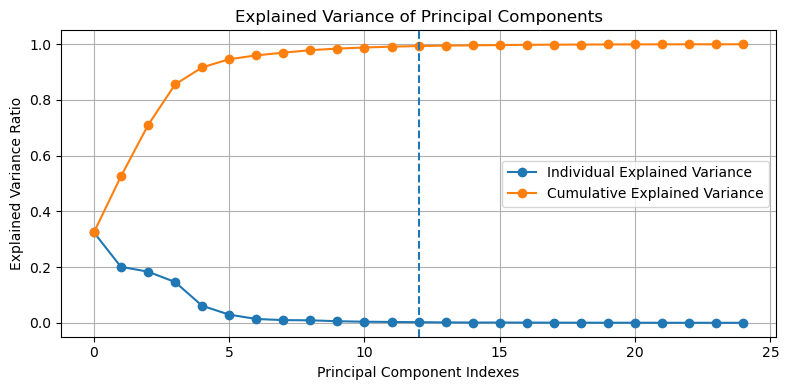

In [34]:
pc = len(X_train_norm.columns.values) #number columns = 25
pca = PCA(n_components=pc)
pca.fit(X_train_norm)

sns.reset_orig()
sns.set_color_codes('pastel')
plt.figure(figsize = (8,4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.legend(["Individual Explained Variance", "Cumulative Explained Variance"])
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.axvline(12, 0, ls='--')
plt.show()

In [35]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['var1'])
cumsum_df['var2'] = pd.Series([round(val, 4) for val in cumsum_df['var1']], index = cumsum_df.index)
cumsum_df['Cumulative Explained Variance'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cumsum_df['var2']], index = cumsum_df.index)
cumsum_df = cumsum_df.drop(['var1','var2'], axis=1, inplace=False)
cumsum_df.T.iloc[:,:15]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Cumulative Explained Variance,32.46%,52.56%,70.93%,85.57%,91.69%,94.63%,96.01%,96.98%,97.88%,98.44%,98.84%,99.14%,99.36%,99.51%,99.61%


The results shown in the graph above are astonishing, since using the first 5 principal components it is possible to capture more than 90% of the total variance. For this project, however, I choose to consider the first 12 principal components. In this way, more than 99% of the variance is explained, while the number of features has been halved.

I fit the PCA algorithm on the training set only, in order to avoid embedding information from the test set and to keep it unknown. After this, I project the test data onto the subspace generated by the first 12 principal components found by computing the covariance matrix on the training set.

In [36]:
pc = 12
pca = PCA(n_components=pc)
pca.fit(X_train_norm)
X_train = pd.DataFrame(pca.transform(X_train_norm))
X_test = pd.DataFrame(pca.transform(X_test_norm))
X_train.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_test.columns = ['PC' + str(i) for i in range(1, pc+1)]
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.541856,-0.551393,-0.412480,0.122101,0.238448,0.715080,-0.118730,-0.217807,0.089929,0.010003,-0.012406,-0.002596
1,-0.499287,-0.532587,-0.456984,0.088489,-0.464270,0.046294,-0.005356,-0.012562,0.043945,0.027395,0.004628,0.006394
2,0.832777,-0.331479,-0.471075,-0.018672,0.173999,0.077012,-0.117121,-0.145521,-0.023793,0.052872,0.009305,-0.071040
3,0.863633,-0.282837,-0.492387,-0.059972,-0.293545,-0.108782,0.099432,-0.142524,0.090122,0.036494,0.002218,0.010245
4,-0.474527,-0.631709,0.548848,0.022170,-0.370284,0.012118,0.082537,-0.129728,-0.140121,-0.031074,0.067107,0.071883


<a id='imbalance'></a>
## 3.5 Dealing with Class Imbalance
I showed in [2.3](#exploration) that the dataset we are dealing with is unbalanced, as the *non-defaulter* examples are over-represented. Actually, class imbalance is a quite common problem when working with real-world data.

In [37]:
class_count = [y_train[y_train == 0].count(), y_train[y_train == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion')
class_count_df

Training set class proportion


,Number,Percentage
Non-defaulters,17246,77.68%
Defaulters,4954,22.32%


In my case, I could achieve almost $80\%$ accuracy by just predicting the majority class (non-defaulters) for all examples, without the help of a supervised machine learning algorithm. Thus, when we will fit classifiers on our datasets, it would make sense to focus on other metrics than accuracy when comparing different models. 

Aside from evaluating machine learning models, class imbalance influences a learning algorithm during model fitting itself. Since machine learning algorithms typically optimize a reward or cost function that is computed as a sum over the training examples that it sees during fitting, the decision rule is likely going to be biased toward the majority class.

I immediately exclude the option of collecting more data. One way to deal with imbalanced class proportions during model fitting is to assign a larger penalty to wrong predictions on the minority class. Other popular strategies for dealing with class imbalance include upsampling the minority class, downsampling the majority class, and the generation of synthetic training examples. Unfortunately, there is no universally best solution or technique that works best across different problem domains. Thus, in practice, it is recommended to try out different strategies on a given problem, evaluate the results, and choose the technique that seems most appropriate.

I decide to exclude the naïve methods of oversampling (undersampling), since they randomly duplicate (delete) data from the minority (majority) class, until the desired level is obtained. On the one hand, random undersampling does not allow to control which information is discarded, on the other hand random oversampling causes overfitting because the model is trained on many identical data. To mitigate these issues, we choose to adopt the Cluster Centroid method and the Synthetic Minority Oversampling Technique (SMOTE).

### 3.5.1 Cluster Centroid Undersampling
The dataset provides enough samples in the minority class to allow us to perform undersampling. However, one major problem of using undersampling is that important information may be lost from the majority class, which can cause overly general rules. This cannot be afforded to develop the credit card default prediction model, especially for default samples. Hence, to overcome this problem, the Cluster Centroids method has been introduced.

The idea of the Cluster Centroids method is to replace clusters of majority samples with the respective cluster centroids. A K-means algorithm is fitted to the data, and the number of clusters is set equal to the number of samples of the minority class. Then, the majority of samples from the clusters are entirely substituted by the sets of cluster centroids from K-means. Cluster Centroids contain the most representative variations of the majority class in which features values would be visualized at the center.<br>

In the dataframe below I show the result of undersampling. Now the training set is balanced and the number of *non-defaulters* equals the number of *defaulters*.

In [39]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.under_sampling import ClusterCentroids

oversample = ClusterCentroids(random_state=24)
X_train_cc, y_train_cc = oversample.fit_resample(X_train, y_train)

In [41]:
class_count = [y_train_cc[y_train_cc == 0].count(), y_train_cc[y_train_cc == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after Cluster Centroid Undersampling')
class_count_df

# non-defaulters 4954
# defaulters 4954

Training set class proportion after Cluster Centroid Undersampling


,Number,Percentage
Non-defaulters,4954,50.00%
Defaulters,4954,50.00%


### 3.5.2 Synthetic Minority Oversampling Technique
The Synthetic Minority Oversampling Technique (SMOTE) was proposed to avoid the risk of overfitting faced by random oversampling. Instead of merely replicating existing observations, the technique generates artificial samples. This is achieved by linearly interpolating a randomly selected minority observation and one of its neighboring minority observations.

In the dataframe below I show the result of SMOTE oversampling. Now the training set is balanced and the number of *defaulters* equals the number of *non-defaulters*.

In [42]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=24)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [43]:
class_count = [y_train_smote[y_train_smote == 0].count(), y_train_smote[y_train_smote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after SMOTE Oversampling')
class_count_df

# non-defaulters 17246
# defaulters 17246

Training set class proportion after SMOTE Oversampling


,Number,Percentage
Non-defaulters,17246,50.00%
Defaulters,17246,50.00%


However, the algorithm has some weaknesses dealing with imbalance and noise. Since SMOTE randomly chooses a minority instance to oversample with uniform probability, densely populated minority areas are very likely to be further inflated, while sparsely populated minority areas remain sparse. Another major concern is that SMOTE is susceptible to noise generation. This happens because the algorithm does not recognize noisy minority samples, which are located among majority class instances, and still interpolate them with their nearest minority neighbor. Finally, the algorithm does not specifically enforce the decision boundary, while it has been argued that classifiers could benefit from the generation of samples closer to the class border.

### 3.5.3 K-means SMOTE
This method employs the simple and popular K-means clustering algorithm in conjunction with SMOTE oversampling in order to rebalance skewed datasets. It manages to avoid the generation of noise by oversampling only in safe areas (i.e., areas made up of at least 50\% of minority samples). Moreover, its focus is placed on both between-class imbalance and within-class imbalance, fighting the small disjuncts problem by inflating sparse minority areas.

In the dataframe below I show the result of K-means SMOTE oversampling. Now the training set is balanced and the number of *defaulters* equals the number of *non-defaulters*.

In [44]:
from imblearn.over_sampling import KMeansSMOTE

oversample = KMeansSMOTE(cluster_balance_threshold=0.00001, random_state=24)
X_train_ksmote, y_train_ksmote = oversample.fit_resample(X_train, y_train)

In [45]:
class_count = [y_train_ksmote[y_train_ksmote == 0].count(), y_train_ksmote[y_train_ksmote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index=['Non-defaulters', 'Defaulters'], columns=['Number'])
class_count_df['var2'] = pd.Series([round(val/class_count_df['Number'].sum(axis=0), 4) for val in class_count_df['Number']], index = class_count_df.index)
class_count_df['Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in class_count_df['var2']], index = class_count_df.index)
class_count_df = class_count_df.drop(['var2'], axis=1, inplace=False)
print('Training set class proportion after K-means SMOTE Oversampling')
class_count_df

Training set class proportion after K-means SMOTE Oversampling


,Number,Percentage
Non-defaulters,17246,49.99%
Defaulters,17252,50.01%


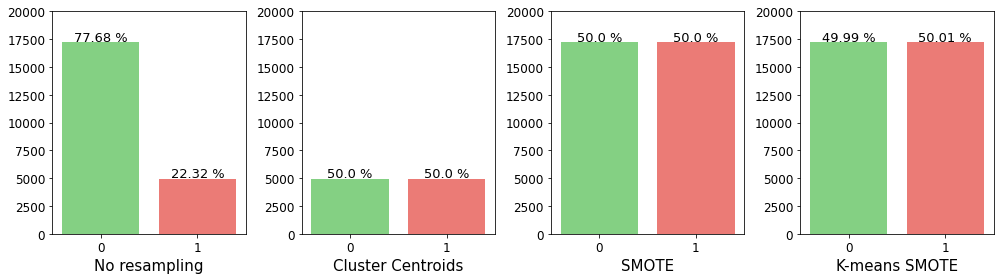

In [40]:
y_list = [y_train, y_train_cc, y_train_smote, y_train_ksmote]
y_list_labels = ['No resampling', 'Cluster Centroids', 'SMOTE', 'K-means SMOTE']

plt.figure(figsize=(14,4))

i = 1
for value, label in zip(y_list,y_list_labels):    
    plt.subplot(1,4,i)
    graph_target = sns.countplot(value, palette=['#77DD76','#FF6962']) 
    plt.xlabel(label, fontdict= {"size":15})
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    j=0
    for p in graph_target.patches:
        height = p.get_height()

        str_plot = f'{round(100 * value.value_counts()[j]/len(value),2)} %'

        graph_target.text(p.get_x()+p.get_width()/2., height + 100 , str_plot, ha="center", fontsize = 13)
        j += 1
        
    i += 1
    graph_target.set_ylim(0, 20000) 

plt.tight_layout()
plt.savefig('images/resamplingDataset.svg')
plt.show()

<a id='method'></a>
# 4. Model Evaluation Methodology
<a id='validation'></a>
## 4.1 Validation
A validation set could be held out of the training set, to evaluate on it the performance of the model. However, this is not recommended because performance estimation may be sensitive to how we partition the training set.

### 4.1.1 K-Fold Cross-Validation
Instead of holdout, a more robust technique for model tuning is **k-fold cross-validation**.

Since k-fold cross-validation is a resampling technique without replacement, the advantage of this approach is that each example will be used for training and validation (as part of a test fold) exactly once, which yields a lower-variance estimate of the model performance than the holdout method.

<a id='metrics'></a>
## 4.2 Performance Evaluation Metrics
Classification assessment metrics compare the true class membership of each observation with the prediction of the classifier. To illustrate the alignment of binary predictions with the true distribution, a **confusion matrix** can be constructed.

|            | Predicted Negative | Predicted Positive |
|:----------:|:-------------:|:-------------:|
| **Actual Negative** |       TN      |       FP      |
| **Actual Positive** |       FN      |       TP      |

The following terminology is often used when referring to the counts tabulated in a confusion matrix:
- True positive (TP), which corresponds to the number of positive examples correctly predicted by the classification model.
- False negative (FN), which corresponds to the number of positive examples wrongly predicted as negative by the classification model.
- False positive (FP), which corresponds to the number of negative examples wrongly predicted as positive by the classification model.
- True negative (TN), which corresponds to the number of negative examples correctly predicted by the classification model.

**Precision** and **recall** are two widely used class-specific metrics employed in applications where successful detection of one of the classes is considered more significant than detection of the other class.

- Precision indicates how many of the positive predictions are correct. The higher the precision is, the lower the number of false positive errors committed by the classifier.
- Recall measures how many positive instances are correctly classified as such. Classifiers with large recall have very few positive examples misclassified as the negative class.

Building a model that maximizes both precision and recall is the key challenge of classification algorithms. Hence, these two metrics are usually summarized into another metric known as the F1-score.


### 4.2.1 Precision-Recall Curve
A *precision-recall* (PR) curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds. I use it to explore the trade-off between the well-classified positive examples and the number of misclassified negative examples.


With the PR curve, I also plot a horizontal line with the value of the ratio of positive cases in the dataset. 

Besides, the area under the PR curve (AUC) is a good way to get a score for the general performance of a classifier and to compare it to that of another classifier.

<a id='models'></a>
# 5. Classification Models
In this section, I present different supervised learning algorithms that I use them on our dataset to build a classification model that is able to predict credit card defaults in the next month.

<a id='logistic'></a>
## 5.1 Logistic Regression
### 5.1.1 Introduction to Generalized Linear Models
Generalized Linear Models (GLM) are a broad class of models that provide a unifying framework for many commonly used statistical techniques, such as the linear regression. 

### 5.1.2 The Logistic Model
In our case, the response `DEFAULT` falls into one of two categories, $\text{Yes}=1, \text{No}=0$, thus we assume a Bernoulli distribution for $Y$. Rather than modeling this response $Y$ directly, *logistic regression* models the probability that $Y$ belongs to a particular category using the *logistic function* as activation function $h$

To fit the model, we use in the next section the *maximum likelihood* method.


### 5.1.3 Estimating the Regression Coefficients
We use the maximum likelihood method to find $\hat{\beta}$ such that, plugging this estimate into the model given in (\ref{logistic_function}), yields a number close to one for all individuals who defaulted, and a number close to zero for all individuals who did not. 

<a id='logistic-selection'></a>
### 5.1.4 Model Selection
In this study, I use the logistic regression model featured in the *Scikit-learn* library. Here, $\mathscr{l}_2$ regularization is applied by default, which is common in machine learning but not in statistics. 

I perform cross-validated grid-search over the following parameter grid to find the best configuration for our logistic regression model to use to predict the test set.

```python
params = {'C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
```

In [47]:
# Plots a barchart with the F1 results and a confusion matrix on the best estimator with the best preprocessing technique
def plot_summary(result, resampling_names, y_pred, y_test):
    
    fig = plt.figure(constrained_layout=False,figsize=(14,4))
    gs1 = fig.add_gridspec(nrows=1, ncols=6, left=0.1, right=0.90, wspace=0.5, hspace=0.5)
    ax1 = fig.add_subplot(gs1[0,0:3])
    ax2 = fig.add_subplot(gs1[0,3:5])
    
    plot_x = []
    plot_y = []
    
    for i in range(len(result)):
        plot_x.append(result[i])
        plot_y.append(resampling_names[i])

    temp_df = pd.DataFrame({'x':plot_x, 'y':plot_y}).sort_values(['x'], ascending=False)
    
    # plot barchart
    sns.barplot(data=temp_df, x='x',y='y', 
                palette='Greens_r',
                ax=ax1)
    ax1.set_xlabel("F1-score", fontsize="14")
    ax1.set_ylabel("")
    ax1.set_yticklabels(temp_df.y,fontsize=13)
    
    # confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, 
                cmap=plt.cm.Greens, 
                annot_kws={"size": 14},
                linecolor = 'w',
                linewidth = 4,ax=ax2,
                fmt='d'
               )
    
    ax2.set_xlabel("Predicted labels",fontsize="14")
    ax2.set_ylabel("True labels",fontsize="14")
    
    return plt


def plot_test_scores(model, oversample, plot):
    
    if oversample == 'raw':
        X_test_s = X_test_norm.copy()
    else:
        X_test_s = X_test.copy()
    
    # predict
    y_pred = model.predict(X_test_s)
    
    # various tests
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test, y_pred)
    
    #print on console
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")
    
    #plot results
    if plot:
        fig, axs = plt.subplots(1, 3, figsize=(15,4))
        
        tmp = pd.DataFrame({'Feature': X_test_s.columns, 
                            'Feature importance': model.best_estimator_.feature_importances_})
        tmp = tmp.sort_values(by='Feature importance', ascending=False)
        s = sns.barplot(x='Feature', y='Feature importance', data=tmp, ax=axs[0])
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        
        plot_confusion_matrix(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[1])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[2])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[2].legend(loc = 'upper right')
        plt.show()
    else:
        fig, axs = plt.subplots(1, 2, figsize=(10,4))
        plot_confusion_matrix(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[0])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[1])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[1].legend(loc = 'upper right')
        plt.show()
    
    return test_acc, test_recall, test_precision, test_f1, test_auc


def pipeline(model, params, oversample=None, plot=False):
    
    max_f1 = 0
    y_pred_max = 0
    y_test_max = 0
    
    if oversample:
        if oversample == 'raw': #without PCA
            X_train_s = X_train_norm.copy() #original data scaled
            y_train_s = y_train.copy()
            X_test_f1 = X_test_raw.copy()
        else:
            X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)
            X_test_f1 = X_test.copy()
    else:
        X_train_s = X_train.copy() #with PCA without resampling
        y_train_s = y_train.copy()
        X_test_f1 = X_test.copy()
    
    #gridsearch best parameter
    gridsearch = GridSearchCV(estimator = model,
                      param_grid = params,
                      scoring = 'f1',
                      cv = 5, 
                      n_jobs = -1,
                      verbose = True)
    gridsearch.fit(X_train_s, y_train_s)
    print(f"Best parameters:\t{gridsearch.best_params_}")
    print(f"Best validation score:\t{gridsearch.best_score_}")
    
    test_scores = plot_test_scores(gridsearch, oversample, plot)
    
    best_estimator = gridsearch.best_estimator_
    
    # save best config
    y_pred = best_estimator.predict(X_test_f1)
    f1 = round(f1_score(y_test, y_pred),2)

    if f1 > max_f1:
        y_pred_max = y_pred
        y_test_max = y_test
        max_f1 = f1
    
    return test_scores, y_pred_max, y_test_max

In [ ]:
pip install -U scikit-learn

In [42]:
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

oversample_method = ['raw',
                     None, 
                     SMOTE(random_state=24),
                     KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
                     ClusterCentroids(random_state=24)]
oversample_names = ['Raw data', 
                    'PCA', 
                    'PCA + SMOTE oversampling', 
                    'PCA + KMeansSMOTE oversampling', 
                    'PCA + ClusterCentroids oversampling']
scores_lr = {'Accuracy' : [float for i in range(len(oversample_method))],
             'Recall' : [float for i in range(len(oversample_method))],
             'Precision' : [float for i in range(len(oversample_method))], 
             'F1-score' : [float for i in range(len(oversample_method))],
             'AUC' : [float for i in range(len(oversample_method))],}

Logistic Regression with Raw data
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.27946732816436864
Test Scores:
- Accuracy:	0.8048912309147412
- Recall:	0.19624470018170806
- Precision:	0.7346938775510204
- F1-score:	0.30975143403441685
- AUC:		0.5551193361572708


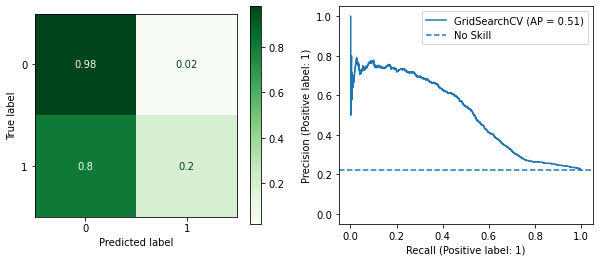

Logistic Regression with PCA
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.27924371052935976
Test Scores:
- Accuracy:	0.8042156465342521
- Recall:	0.19200484554815264
- Precision:	0.7337962962962963
- F1-score:	0.3043686989918387
- AUC:		0.5530235272794735


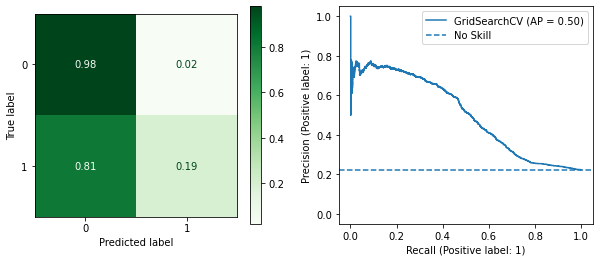

Logistic Regression with PCA + SMOTE oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 1.0}
Best validation score:	0.663015565520895
Test Scores:
- Accuracy:	0.6319416295095257
- Recall:	0.6795881284070261
- Precision:	0.3382574615616521
- F1-score:	0.45169082125603865
- AUC:		0.5446612087122137


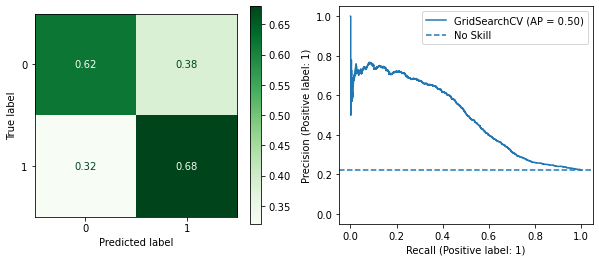

Logistic Regression with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 10.0}
Best validation score:	0.7325059123562209
Test Scores:
- Accuracy:	0.7247669233887313
- Recall:	0.3634161114476075
- Precision:	0.37831021437578816
- F1-score:	0.3707136237256719
- AUC:		0.44186708130110464


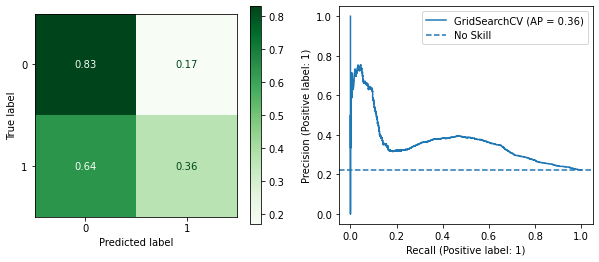

Logistic Regression with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 10.0}
Best validation score:	0.6527932511996625
Test Scores:
- Accuracy:	0.5977570598567761
- Recall:	0.6662628709872804
- Precision:	0.31196823596142936
- F1-score:	0.4249565385358316
- AUC:		0.5263402528393056


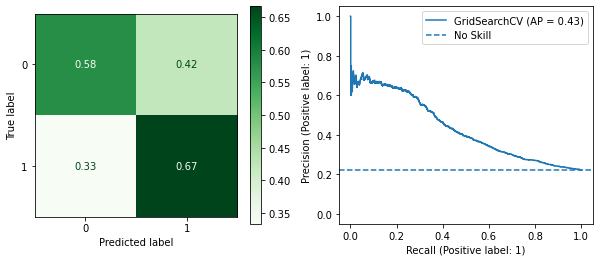

,Accuracy,Recall,Precision,F1-score,AUC
Raw data,0.804891,0.196245,0.734694,0.309751,0.555119
PCA,0.804216,0.192005,0.733796,0.304369,0.553024
PCA + SMOTE oversampling,0.631942,0.679588,0.338257,0.451691,0.544661
PCA + KMeansSMOTE oversampling,0.724767,0.363416,0.378310,0.370714,0.441867
PCA + ClusterCentroids oversampling,0.597757,0.666263,0.311968,0.424957,0.526340


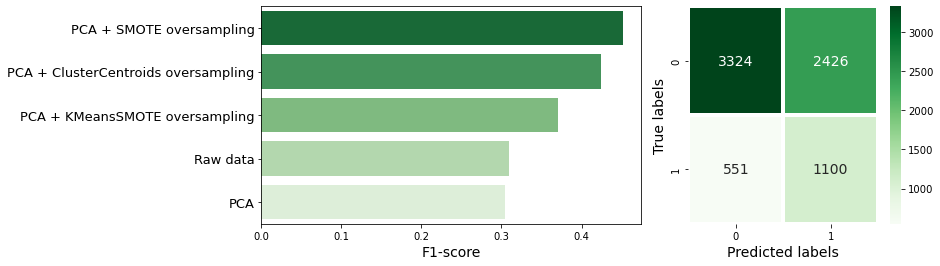

In [43]:
params_lr = {'C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
for idx, oversample in enumerate(oversample_method):
    print(f"Logistic Regression with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = pipeline(LogisticRegression(random_state=24, max_iter=1000, n_jobs=-1),
                                              params_lr,
                                              oversample)
    scores_lr['Accuracy'][idx] = scores[0]
    scores_lr['Recall'][idx] = scores[1]
    scores_lr['Precision'][idx] = scores[2]
    scores_lr['F1-score'][idx] = scores[3]
    scores_lr['AUC'][idx] = scores[4]
    
scores_lr_df = pd.DataFrame(data=scores_lr, index=oversample_names)
plot = plot_summary(scores_lr_df["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryLogReg.svg")
scores_lr_df

The dataframe above summarizes the Logistic Regression results on the test set, obtained by experimenting with different pre-processing techniques fitted on the training set. PCA allows us to achieve the same performance as using all the data, but with half the features. Notice that not using any oversampling method leads to the highest accuracy and AUC, but results in a lower F1-score. The original SMOTE outperforms both Cluster Centroid and the novel K-means SMOTE.

In the graphs we can see a steep drop at the beginning of the PR curves. This is due to the fact that the threshold is particularly high there, so there are few TPs and FPs to calculate the precision and even a single mis-classification can lead to a large shift.

<a id='svm'></a>
## 5.2 Support Vector Machine
As supervised learning methods, Support Vector Machines (SVMs) solve the optimization problem of finding the hyperplane that maximizes the margin between two classes in the feature space.

### 5.2.5 Model Selection
There are several standard PDS kernels commonly used in applications. In this project, I use the Support Vector Classification model featured in the Scikit-learn library.

Finally, as I did for logistic regression, we try different values of the penalty parameter `C`.

I perform cross-validated grid-search over the following parameter grid to find the best configuration for our SVC model to use to predict the test set.

```python
params = {'C': [1e-1, 1e0, 1e1, 1e2],
          'kernel': ['rbf', 'poly'],
          'gamma': [1e-1, 'scale']}
```

In [44]:
oversample_method = ['raw',
                     None, 
                     SMOTE(random_state=24),
                     KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
                     ClusterCentroids(random_state=24)]
oversample_names = ['Raw data', 
                    'PCA', 
                    'PCA + SMOTE oversampling', 
                    'PCA + KMeansSMOTE oversampling', 
                    'PCA + ClusterCentroids oversampling']
scores_svm = {'Accuracy' : [float for i in range(len(oversample_method))],
             'Recall' : [float for i in range(len(oversample_method))],
             'Precision' : [float for i in range(len(oversample_method))], 
             'F1-score' : [float for i in range(len(oversample_method))],
             'AUC' : [float for i in range(len(oversample_method))],}

Support Vector Machine with Raw data
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best validation score:	0.44927163508004886
Test Scores:
- Accuracy:	0.8221861910552628
- Recall:	0.35069654754694124
- Precision:	0.7035236938031592
- F1-score:	0.4680679062247373
- AUC:		0.5995327662634842


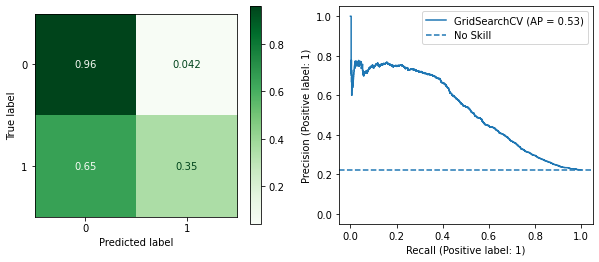

Support Vector Machine with PCA
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best validation score:	0.452377656956216
Test Scores:
- Accuracy:	0.8216457235508715
- Recall:	0.34948516050878253
- Precision:	0.701093560145808
- F1-score:	0.4664510913500404
- AUC:		0.5978471227918272


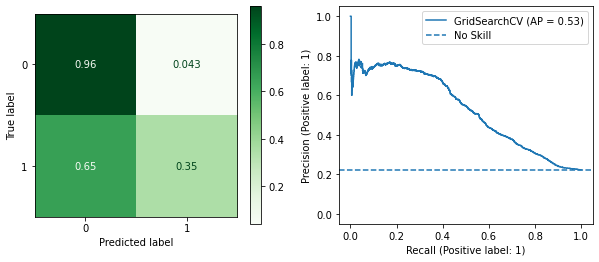

Support Vector Machine with PCA + SMOTE oversampling
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best validation score:	0.6755793952290514
Test Scores:
- Accuracy:	0.7698959600054047
- Recall:	0.5693519079345851
- Precision:	0.4865424430641822
- F1-score:	0.5246999720904271
- AUC:		0.5759812249521603


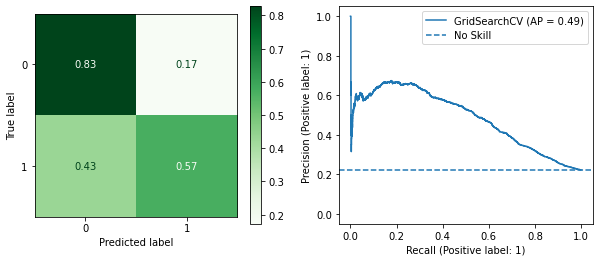

Support Vector Machine with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best validation score:	0.7622860213760343
Test Scores:
- Accuracy:	0.7470612079448723
- Recall:	0.49061175045427013
- Precision:	0.43997827267789247
- F1-score:	0.46391752577319584
- AUC:		0.5221116579652165


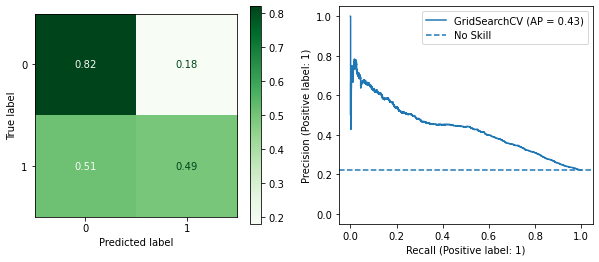

Support Vector Machine with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:	{'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best validation score:	0.6921628171993855
Test Scores:
- Accuracy:	0.5714092690177003
- Recall:	0.7383403997577226
- Precision:	0.3079060368779995
- F1-score:	0.43458110516934045
- AUC:		0.5523084635549912


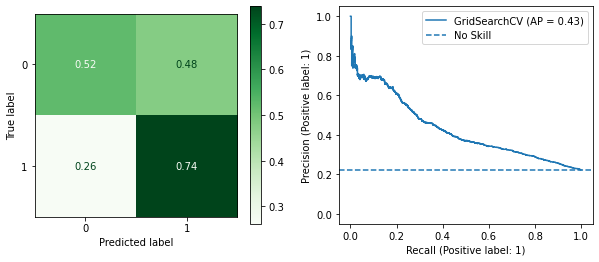

,Accuracy,Recall,Precision,F1-score,AUC
Raw data,0.822186,0.350697,0.703524,0.468068,0.599533
PCA,0.821646,0.349485,0.701094,0.466451,0.597847
PCA + SMOTE oversampling,0.769896,0.569352,0.486542,0.524700,0.575981
PCA + KMeansSMOTE oversampling,0.747061,0.490612,0.439978,0.463918,0.522112
PCA + ClusterCentroids oversampling,0.571409,0.738340,0.307906,0.434581,0.552308


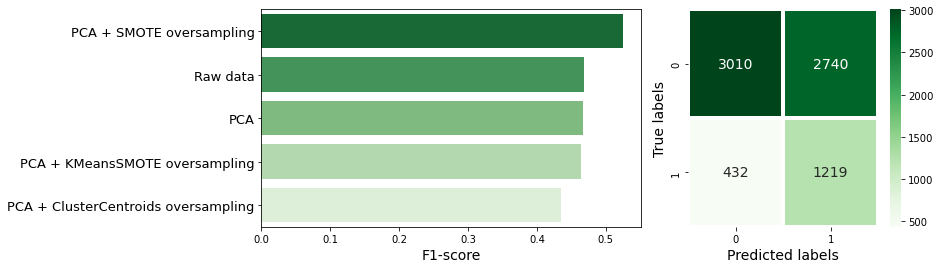

In [45]:
params_svm = {'C': [1e-1, 1e0, 1e1, 1e2], 
              'kernel': ['rbf', 'poly'], 
              'gamma': [1e-1, 'scale']}
for idx, oversample in enumerate(oversample_method):
    print(f"Support Vector Machine with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = pipeline(SVC(),
                         params_svm,
                         oversample)
    scores_svm['Accuracy'][idx] = scores[0]
    scores_svm['Recall'][idx] = scores[1]
    scores_svm['Precision'][idx] = scores[2]
    scores_svm['F1-score'][idx] = scores[3]
    scores_svm['AUC'][idx] = scores[4]
    
scores_svm_df = pd.DataFrame(data=scores_svm, index=oversample_names)
plot = plot_summary(scores_svm_df["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summarySVM.svg")
scores_svm_df

The outputs above show that the Grid-Search usually selects the `rbf` kernel and a high value of `C`. This means that the model aims to correctly classify all training examples, rather than building a smooth decision boundary.

We can see in the dataframe that in this case not oversampling still leads to good results on the test set in terms of F1-score. We think it is due to the fact that the model needs few significant examples to be used as support vectors to build the decision boundary.

<a id='tree'></a>
## 5.3 Tree-Based Methods
Tree-based methods provide a simple, intuitive, and powerful mechanism for both regression and classification. The main idea is to *stratify* a (potentially complicated) feature space into smaller regions and fit a simple prediction function to each region. In order to classify a given observation, we typically use the mode response value for the training observations in the region to which it belongs. Since the set of splitting rules used to segment the predictor space can be summarized in a tree, these types of approaches are known as *decision tree* methods.

### 5.3.1 Decision Trees
Decision tree classifiers are attractive models if we care about interpretability. They involve creating a set of binary splits on the predictor variables in order to create a tree that can be used to classify new observations into one of two groups.

Below I build a shallow decision tree using raw data from our dataset to show its interpretability. Since I'm not going deep, the classes are still distributed uniformly at the terminal nodes (i.e., the *leaves*) and the entropy measure is very high.

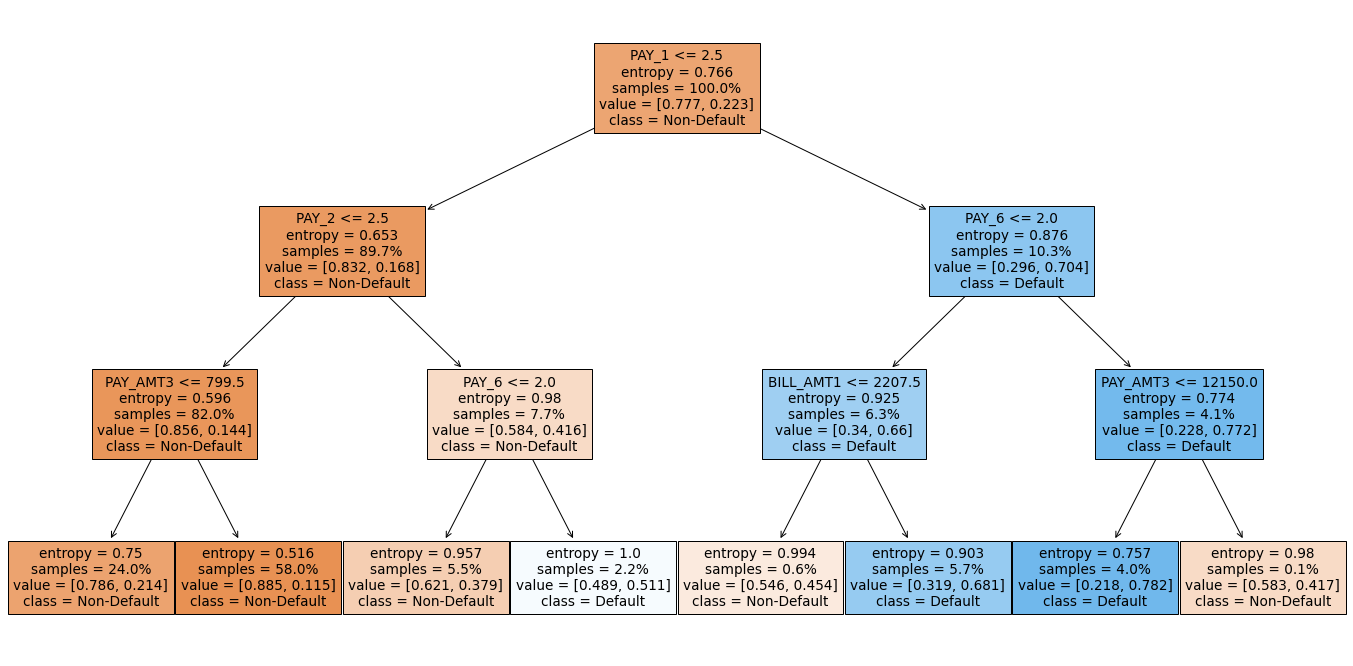

In [46]:
clf = DecisionTreeClassifier(max_depth=3, 
                             criterion='entropy', 
                             max_features=None)
clf.fit(X_train_raw, y_train)
plt.figure(figsize=(24,12))
tree.plot_tree(decision_tree=clf,
               feature_names=X_train_raw.columns, 
               class_names=['Non-Default','Default'],
               filled=True, proportion=True)
plt.show()

In practice, both Gini impurity and entropy typically yield very similar results. Hence, I think it is not worth spending much time on evaluating trees using different impurity criteria, and we rather experiment with different pruning cut-offs.

```python
params = {'max_depth': [5, 10, 20, 30, 50],
          'criterion': ['entropy']}
```

In [48]:
def plot_tree_test_scores(model, oversample, plot):
    
    if oversample == 'raw':
        X_test_s = X_test_raw.copy()
    else:
        X_test_s = X_test.copy()
        
    # predict 
    y_pred = model.predict(X_test_s)
    
    # various tests
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test, y_pred)
    
    #print on console
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")
    
    #plot results
    if plot:
        fig, axs = plt.subplots(1, 3, figsize=(15,4))
        
        tmp = pd.DataFrame({'Feature': X_test_s.columns, 
                            'Feature importance': model.best_estimator_.feature_importances_})
        tmp = tmp.sort_values(by='Feature importance', ascending=False)
        s = sns.barplot(x='Feature', y='Feature importance', data=tmp, ax=axs[0])
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        
        plot_confusion_matrix(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[1])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[2])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[2].legend(loc = 'upper right')
        plt.show()
    else:
        fig, axs = plt.subplots(1, 2, figsize=(10,4))
        plot_confusion_matrix(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[0])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plot_precision_recall_curve(model, X_test_s, y_test, ax=axs[1])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[1].legend(loc = 'upper right')
        plt.show()
    
    return test_acc, test_recall, test_precision, test_f1, test_auc

def tree_pipeline(model, params, oversample=None, plot=False):
    
    max_f1 = 0
    y_pred_max = 0
    y_test_max = 0
    
    if oversample:
        if oversample == 'raw': #without PCA
            X_train_s = X_train_raw.copy() #original data scaled
            y_train_s = y_train.copy()
            X_test_f1 = X_test_raw.copy()
        else:
            X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)
            X_test_f1 = X_test.copy()
    else:
        X_train_s = X_train.copy() #with PCA without resampling
        y_train_s = y_train.copy()
        X_test_f1 = X_test.copy()
    
    #gridsearch best parameter
    gridsearch = GridSearchCV(estimator = model,
                      param_grid = params,
                      scoring = 'f1',
                      cv = 5, 
                      n_jobs = -1,
                      verbose = True)
    gridsearch.fit(X_train_s, y_train_s)
    print(f"Best parameters:\t{gridsearch.best_params_}")
    print(f"Best validation score:\t{gridsearch.best_score_}")
    
    test_scores = plot_tree_test_scores(gridsearch, oversample, plot)
    
    best_estimator = gridsearch.best_estimator_
    
    # save best config
    y_pred = best_estimator.predict(X_test_f1)
    f1 = round(f1_score(y_test, y_pred),2)

    if f1 > max_f1:
        y_pred_max = y_pred
        y_test_max = y_test
        max_f1 = f1
    
    return test_scores, y_pred_max, y_test_max

In [49]:
oversample_method = ['raw',
                     None, 
                     SMOTE(random_state=24),
                     KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
                     ClusterCentroids(random_state=24)]
oversample_names = ['Raw data', 
                    'PCA', 
                    'PCA + SMOTE oversampling', 
                    'PCA + KMeansSMOTE oversampling', 
                    'PCA + ClusterCentroids oversampling']
scores_tree = {'Accuracy' : [float for i in range(len(oversample_method))],
             'Recall' : [float for i in range(len(oversample_method))],
             'Precision' : [float for i in range(len(oversample_method))], 
             'F1-score' : [float for i in range(len(oversample_method))],
             'AUC' : [float for i in range(len(oversample_method))],}

Decision Tree with Raw data
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 5}
Best validation score:	0.45813216221308634
Test Scores:
- Accuracy:	0.8205647885420889
- Recall:	0.35978195033313143
- Precision:	0.6867052023121387
- F1-score:	0.47217806041335453
- AUC:		0.5946528453403355


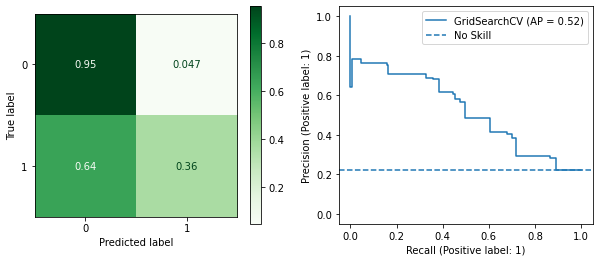

Decision Tree with PCA
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 10}
Best validation score:	0.430074611221572
Test Scores:
- Accuracy:	0.8078638021888934
- Recall:	0.3579648697758934
- Precision:	0.6201469045120671
- F1-score:	0.4539170506912442
- AUC:		0.5606678314758273


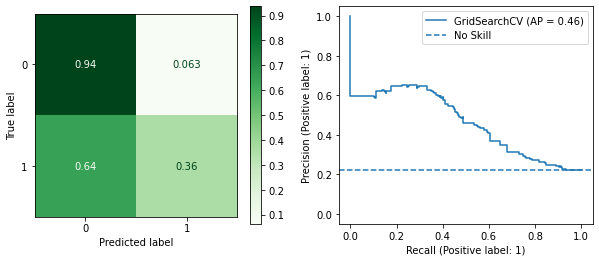

Decision Tree with PCA + SMOTE oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 50}
Best validation score:	0.762111126627109
Test Scores:
- Accuracy:	0.6842318605593839
- Recall:	0.48152634766807995
- Precision:	0.3492970123022847
- F1-score:	0.40488922841864017
- AUC:		0.47324170295505125


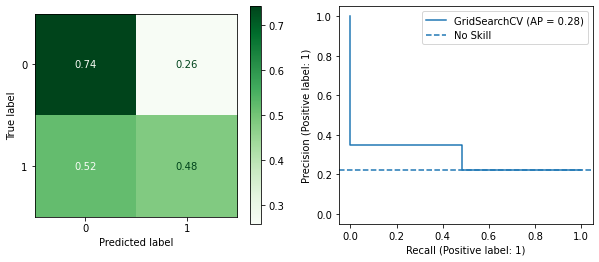

Decision Tree with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 20}
Best validation score:	0.7834135816908295
Test Scores:
- Accuracy:	0.7459802729360897
- Recall:	0.42216838279830404
- Precision:	0.42945163277880466
- F1-score:	0.42577886377519847
- AUC:		0.4902607576872167


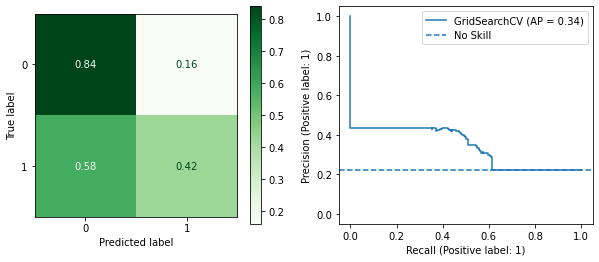

Decision Tree with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 10}
Best validation score:	0.656376360481173
Test Scores:
- Accuracy:	0.5460072963113093
- Recall:	0.6747425802543913
- Precision:	0.28295656591313184
- F1-score:	0.3987115246957767
- AUC:		0.5151284543160275


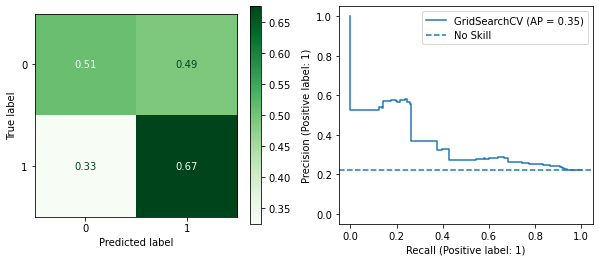

,Accuracy,Recall,Precision,F1-score,AUC
Raw data,0.820565,0.359782,0.686705,0.472178,0.594653
PCA,0.807864,0.357965,0.620147,0.453917,0.560668
PCA + SMOTE oversampling,0.684232,0.481526,0.349297,0.404889,0.473242
PCA + KMeansSMOTE oversampling,0.745980,0.422168,0.429452,0.425779,0.490261
PCA + ClusterCentroids oversampling,0.546007,0.674743,0.282957,0.398712,0.515128


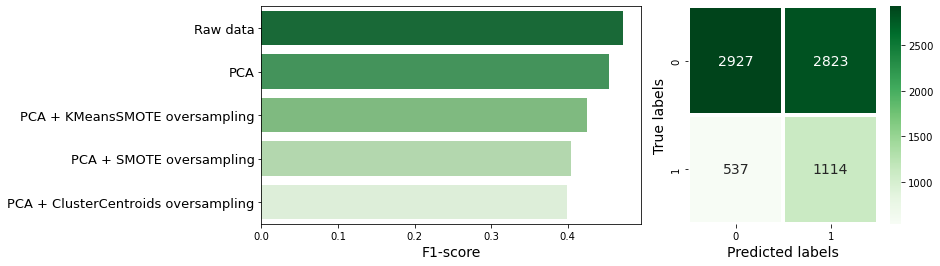

In [49]:
params_tree = {'max_depth': [5, 10, 20, 30, 50]}
for idx, oversample in enumerate(oversample_method):
    print(f"Decision Tree with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = tree_pipeline(DecisionTreeClassifier(criterion='entropy', max_features=None, random_state=24),
                         params_tree,
                         oversample)
    scores_tree['Accuracy'][idx] = scores[0]
    scores_tree['Recall'][idx] = scores[1]
    scores_tree['Precision'][idx] = scores[2]
    scores_tree['F1-score'][idx] = scores[3]
    scores_tree['AUC'][idx] = scores[4]
    
scores_rf_tree = pd.DataFrame(data=scores_tree, index=oversample_names)
plot = plot_summary(scores_rf_tree["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryTree.svg")
scores_rf_tree

The results reported in the dataframe above show that the decision tree works best with raw data. Having this baseline, I try to improve predictive performance by aggregating different decision trees in a random forest.

### 5.3.2 Random Forest
Decision trees are said to suffer from *high variance*, as if we randomly split the training data into two parts, and fit a decision tree on both halves, we could get quite different results. I want to lower the variance of our model in order to obtain similar results if we apply it repeatedly on different datasets. It is possible to reduce the variance of a model by building an *ensemble* of several classifiers trained on different sets from a population, and averaging the resulting predictions. However, in my case I do not have access to multiple training sets, so I take repeated samples from the dataset to generate different *bootstrapped training sets*. In this way I can build several decision trees whose predictions I can aggregate with a *majority voting* procedure. This approach is called *bootstrap aggregating*, or **bagging**.

The major idea of **random forests** is to perform bagging in combination with a *decorrelation* of the trees. For each bootstrapped training set, we build a decision tree using a randomly selected *subset* of features for the splitting rules. 

In the `RandomForestClassifier` implementation in Scikit-Learn, the size of the bootstrap sample is chosen to be equal to the number of training examples in the original training dataset, which usually provides a good
bias-variance tradeoff. In my model selection procedure, I do not even have to worry about the depth of the trees, since the forest is quite robust to the noise from the single tree. I'm rather interested in the number of trees that form the forest and the maximum number of features to consider when looking for the best split: if the latter number is `None`, I'm not decorrelating the trees and I'm performing bagging.

```python
params = {'n_estimators': [10, 50, 100, 200], 
          'max_features': [None, 'sqrt']}
```

In [50]:
oversample_method = ['raw',
                     None, 
                     SMOTE(random_state=24),
                     KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
                     ClusterCentroids(random_state=24)]
oversample_names = ['Raw data', 
                    'PCA', 
                    'PCA + SMOTE oversampling', 
                    'PCA + KMeansSMOTE oversampling', 
                    'PCA + ClusterCentroids oversampling']
scores_rf = {'Accuracy' : [float for i in range(len(oversample_method))],
             'Recall' : [float for i in range(len(oversample_method))],
             'Precision' : [float for i in range(len(oversample_method))], 
             'F1-score' : [float for i in range(len(oversample_method))],
             'AUC' : [float for i in range(len(oversample_method))],}

Random Forest with Raw data
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 200}
Best validation score:	0.4695030676559674
Test Scores:
- Accuracy:	0.8209701391703824
- Recall:	0.39672925499697154
- Precision:	0.665650406504065
- F1-score:	0.49715370018975336
- AUC:		0.598478035047235


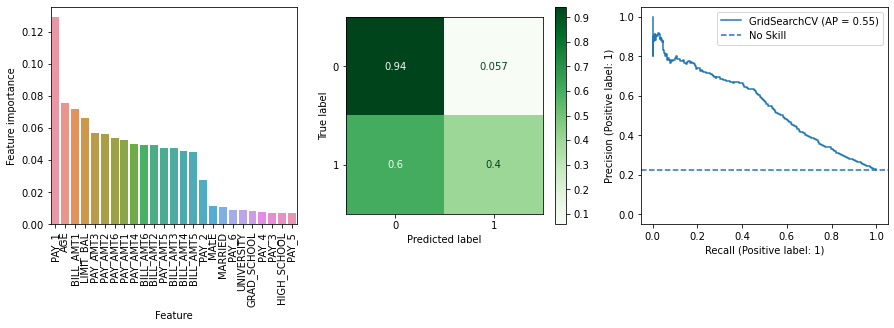

Random Forest with PCA
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 100}
Best validation score:	0.4419014087953347
Test Scores:
- Accuracy:	0.8074584515605999
- Recall:	0.36281041792852814
- Precision:	0.6162551440329218
- F1-score:	0.45672893633244377
- AUC:		0.5606042578081807


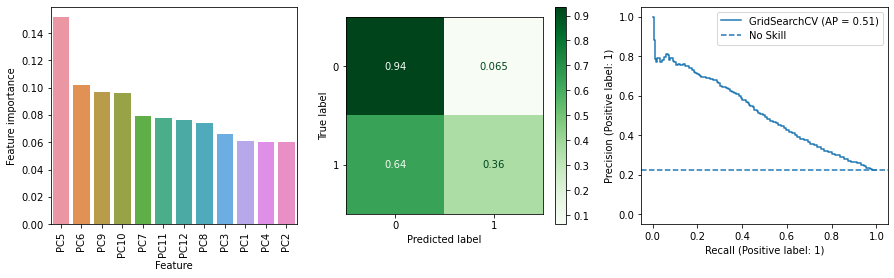

Random Forest with PCA + SMOTE oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': 'sqrt', 'n_estimators': 200}
Best validation score:	0.8350874582586624
Test Scores:
- Accuracy:	0.7647615187136874
- Recall:	0.5160508782556027
- Precision:	0.47491638795986624
- F1-score:	0.4946298984034833
- AUC:		0.5494628251088154


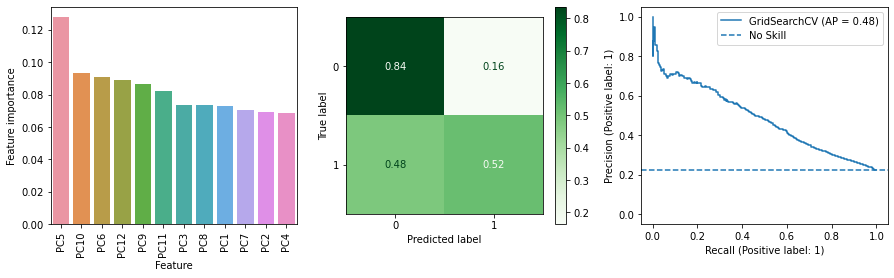

Random Forest with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 200}
Best validation score:	0.8111537515961622
Test Scores:
- Accuracy:	0.7844885826239697
- Recall:	0.4270139309509388
- Precision:	0.5206794682422452
- F1-score:	0.46921797004991683
- AUC:		0.537756981990863


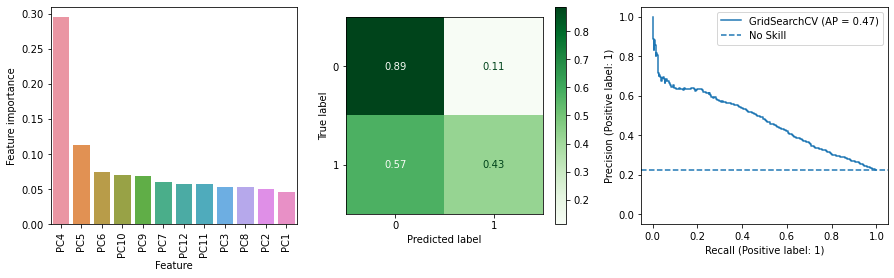

Random Forest with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 100}
Best validation score:	0.6674024856384421
Test Scores:
- Accuracy:	0.5830293203621132
- Recall:	0.6499091459721381
- Precision:	0.2996369729125942
- F1-score:	0.4101681957186544
- AUC:		0.5138218366346375


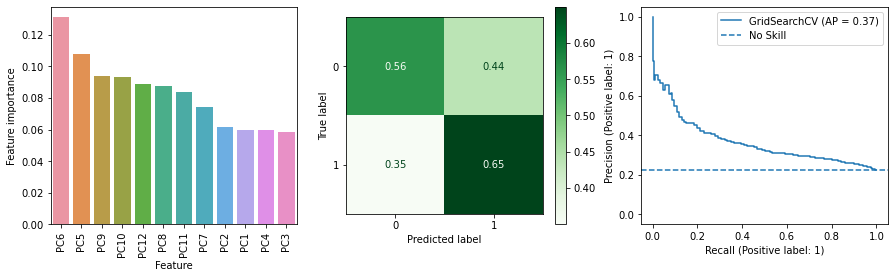

,Accuracy,Recall,Precision,F1-score,AUC
Raw data,0.820970,0.396729,0.665650,0.497154,0.598478
PCA,0.807458,0.362810,0.616255,0.456729,0.560604
PCA + SMOTE oversampling,0.764762,0.516051,0.474916,0.494630,0.549463
PCA + KMeansSMOTE oversampling,0.784489,0.427014,0.520679,0.469218,0.537757
PCA + ClusterCentroids oversampling,0.583029,0.649909,0.299637,0.410168,0.513822


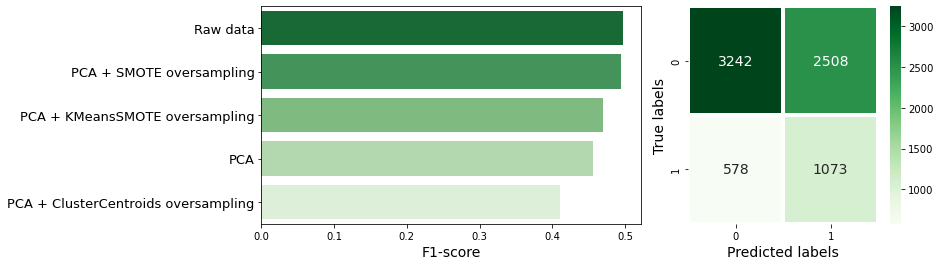

In [51]:
params_rf = {'n_estimators': [10, 50, 100, 200], 
             'max_features': [None, 'sqrt']}
for idx, oversample in enumerate(oversample_method):
    print(f"Random Forest with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = tree_pipeline(RandomForestClassifier(criterion='entropy', random_state=24, n_jobs=-1),
                         params_rf,
                         oversample,
                         True)
    scores_rf['Accuracy'][idx] = scores[0]
    scores_rf['Recall'][idx] = scores[1]
    scores_rf['Precision'][idx] = scores[2]
    scores_rf['F1-score'][idx] = scores[3]
    scores_rf['AUC'][idx] = scores[4]
    
scores_rf_df = pd.DataFrame(data=scores_rf, index=oversample_names)
plot = plot_summary(scores_rf_df["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryRF.svg")
scores_rf_df

The results reported in the dataframe above show that aggregating multiple trees in a forest leads to an overall improvement in prediction performance. Bagging and Random Forest models are not interpretable as individual decision trees. However, they allow me to measure and plot the feature importance as the averaged impurity decrease computed from all decision trees in the ensemble, without making any assumptions about whether our data are linearly separable or not.

In particular, I can refer to the Random Forest trained on raw data, as it offers a really useful features importance plot. When financial institutions consider issuing the client a credit card, they need to check the payment history of that person, because if he owes numerous bills already, he is likely to delay the payment of the current month. Besides the payment history, it is also imperative to look at the applicants' credit limit of their current credit cards. This is a result of a virtuous
circle: people who pay on duly tend to have better credit scores, so the banks prefer to increase these people's credit lines by taking less risk. Client's personal information also affects the default behavior, as it is collected by the banks when people apply for credit cards. However, I believe that financial institutions should equally consider their potential clients whether they are men or women, high school or university graduate, single or married, when decide whether approve their credit card applications.

<a id='results'></a>
## 5.4 Models' Performance Results
The dataframe below summarizes the results of the combination of different ML algorithms and oversampling techniques on the test set. The figure further down compares the F1-scores of the different models on the test set. We want to clarify that Logistic Regression and SVM did not work with true *raw* data, but with normalized data, unlike Decision Tree and Random Forest.

In [52]:
frames = [scores_lr_df, scores_svm_df, scores_rf_tree, scores_rf_df]
scores_df = pd.concat(frames, keys=['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest'])
scores_df

Accuracy  \
Logistic Regression    Raw data                             0.804891   
                       PCA                                  0.804216   
                       PCA + SMOTE oversampling             0.631942   
                       PCA + KMeansSMOTE oversampling       0.724767   
                       PCA + ClusterCentroids oversampling  0.597757   
Support Vector Machine Raw data                             0.822186   
                       PCA                                  0.821646   
                       PCA + SMOTE oversampling             0.769896   
                       PCA + KMeansSMOTE oversampling       0.747061   
                       PCA + ClusterCentroids oversampling  0.571409   
Decision Tree          Raw data                             0.820565   
                       PCA                                  0.807864   
                       PCA + SMOTE oversampling             0.684232   
                       PCA + KMeansSMOTE oversampling       0.745980   
                       PCA + ClusterCentroids oversampling  0.546007   
Random Forest          Raw data                             0.820970   
                       PCA                                  0.807458   
                       PCA + SMOTE oversampling             0.764762   
                       PCA + KMeansSMOTE oversampling       0.784489   
                       PCA + ClusterCentroids oversampling  0.583029   

                                                              Recall  \
Logistic Regression    Raw data                             0.196245   
                       PCA                                  0.192005   
                       PCA + SMOTE oversampling             0.679588   
                       PCA + KMeansSMOTE oversampling       0.363416   
                       PCA + ClusterCentroids oversampling  0.666263   
Support Vector Machine Raw data                             0.350697   
                       PCA                                  0.349485   
                       PCA + SMOTE oversampling             0.569352   
                       PCA + KMeansSMOTE oversampling       0.490612   
                       PCA + ClusterCentroids oversampling  0.738340   
Decision Tree          Raw data                             0.359782   
                       PCA                                  0.357965   
                       PCA + SMOTE oversampling             0.481526   
                       PCA + KMeansSMOTE oversampling       0.422168   
                       PCA + ClusterCentroids oversampling  0.674743   
Random Forest          Raw data                             0.396729   
                       PCA                                  0.362810   
                       PCA + SMOTE oversampling             0.516051   
                       PCA + KMeansSMOTE oversampling       0.427014   
                       PCA + ClusterCentroids oversampling  0.649909   

                                                            Precision  \
Logistic Regression    Raw data                              0.734694   
                       PCA                                   0.733796   
                       PCA + SMOTE oversampling              0.338257   
                       PCA + KMeansSMOTE oversampling        0.378310   
                       PCA + ClusterCentroids oversampling   0.311968   
Support Vector Machine Raw data                              0.703524   
                       PCA                                   0.701094   
                       PCA + SMOTE oversampling              0.486542   
                       PCA + KMeansSMOTE oversampling        0.439978   
                       PCA + ClusterCentroids oversampling   0.307906   
Decision Tree          Raw data                              0.686705   
                       PCA                                   0.620147   
                       PCA + SMOTE oversampling              0.349297   
            

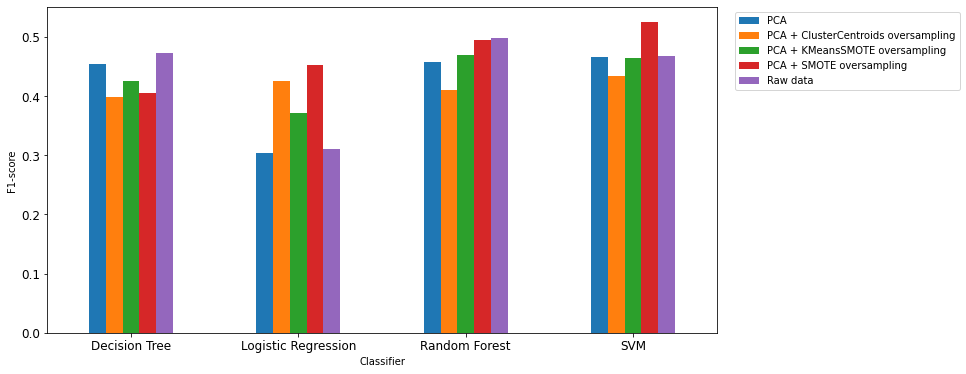

In [53]:
scores_lr_df['Classifier'] = 'Logistic Regression'
scores_lr_df['Technique'] = scores_lr_df.index
#scores_lr_df['Technique'][scores_lr_df['Technique']=='Normalized data'] = 'Raw data'
scores_svm_df['Classifier'] = 'SVM'
scores_svm_df['Technique'] = scores_svm_df.index
#scores_svm_df['Technique'][scores_svm_df['Technique']=='Normalized data'] = 'Raw data'
scores_rf_tree['Classifier'] = 'Decision Tree'
scores_rf_tree['Technique'] = scores_rf_tree.index
scores_rf_df['Classifier'] = 'Random Forest'
scores_rf_df['Technique'] = scores_rf_df.index

frames2 = [scores_lr_df, scores_svm_df, scores_rf_tree, scores_rf_df]
scores = pd.concat(frames2, ignore_index=True, keys=None)

scores.set_index(['Technique', 'Classifier']).unstack(0).plot(kind='bar', 
                                                              y='F1-score', 
                                                              ylabel='F1-score', 
                                                              figsize=(12,6), 
                                                              fontsize=12, 
                                                              rot=0).legend(bbox_to_anchor=(1.02, 1))

In general, oversampling improves predictive performance compared to undersampling. The original SMOTE algorithm works better than the novel version and allows to obtain the best model when used in conjuction with an SVM. However, I would like to acknowledge that the results of the random forest are remarkable. In fact, this model not only works well with raw data (second best overall), but also provides us with a ranking of the feature importances that can be useful to the financial institutions.

<a id='conclusion'></a>
# 6. Conclusion
Machine learning methods have been used in various domains, along with techniques for dealing with unbalanced datasets. The goal of this project has been to train different supervised learning algorithms to predict the client's behavior in paying off the credit card balance.

I used *Default of credit card clients* dataset for this project. I investigated the dataset by using exploratory data analysis techniques. After cleaning the data, I applied data normalization and principal component analysis, in order to prepare the data to be fed to the machine learning algorithms. I started with the Logistic Regression model, then I got the best scores with a Support Vector Machine, and finally I obtained interpretable models using tree-based methods.

Many algorithms have not been used and can be considered for future improvements. For instance, boosting models belong to the tree-based methods, and can be useful to financial institutions as they also provide a ranking of the feature importances. Moreover, starting from the idea that aggregating more trees in a forest improves predictive performance, we can create a voting classifier formed by an ensemble of different predictors, such as SVM, Random Forest, K-Nearest Neighbor, which together could be able to perform a stronger prediction.

Besides, the financial market changes rapidly every day, and people's economic status and performance are affected by the market all the time. Hence, I believe that if more economic indicators will be added to the dataset, this will leads to a more generic model.